# Topic project - Using time series analysis for sales and demand forecasting

In this project, I will be utilising time series analysis techniques to forecast sales and demand. Forecasting involves analysing historical sales data to accurately predict future sales trends and demand patterns.


Using time series analysis for sales and demand forecasting is crucial for data analysis in business because it can enhance decision-making by providing reliable sales and demand forecasts. This helps organisations reduce costs, maximise profits, and optimise resource allocation.


During this project, I will analyse the business scenario and explore the data set. I will then clean historical sales data, perform time series analysis using ARIMA, deep learning, or hybrid methods, and validate the models to ensure their accuracy in predicting future sales and demand patterns.


<br>

## **Business context**



The Nielsen BookScan service is the world’s largest continuous book sales tracking service in the world, operating in the UK, Ireland, Australia, New Zealand, India, South Africa, Italy, Spain, Mexico, Brazil, Poland, and Colombia. Nielsen BookScan collects transactional data at the point of sale, directly from tills and dispatch systems of all major book retailers. This ensures detailed and highly accurate sales information on which books are selling and at what price, giving clients the most up-to-date and relevant data. The Nielsen BookScan Total Consumer Market (TCM) data covers approximately 90% of all retail print book purchases in the UK. The remaining sites are specialised, such as gift shops, specialist booksellers, and tourist information centres.


Nielsen BookScan can be used to:
Monitor titles and authors against the competition and overall market.
Analyse pricing and discounting by format or category.
Gauge the success of marketing campaigns and promotions.
See which categories are growing and declining.
Learn what works in your market and how that might differ from other countries.

Nielsen BookScan sales data can be analysed by various criteria, including category, publisher, and format,
allowing users to see which genres are selling in which format. Users can track market trends to see which titles are driving the results, and patterns can easily be interpreted. In addition, the actual selling price is included. This inclusion makes it easier to identify trends for the level of discounting (e.g. by title, author, genre, format, region, and publisher) when analysing book sales.

**Project context**

Nielsen is seeking to invest in developing a new service aimed at small to medium-sized independent publishers. This service is aimed at supporting publishers in using historical sales data to make data-driven decisions about their future investment in new publications. Their publisher customers are interested in being able to make more accurate predictions of the overall sales profile post-publication for better stock control and initial investment, but they are also interested in understanding the useful economic life span that a title may have.

Nielsen is targeting small to medium-sized independent publishers as their research has shown that there is a strong demand for this insight, but businesses cannot invest in this infrastructure and would pay a premium to have access to quality-assured data and analysis in this area. Producing a new publication requires a significant upfront investment, and they would like to be able to more accurately identify books with strong long-term potential. More specifically, they are looking for titles with sales patterns that exhibit well-established seasonal patterns and positive trends that show potential great returns and to learn more about these types of publications. Nielsen will then apply this understanding to their commission and print volume strategy to be more successful in acquiring titles that have longevity. Additionally, this will enable them to deliver better returns by ensuring the correct stock levels in relation to demand and avoiding over- or understocking, which can be costly.

You will notice that some titles experience fluctuations in sales due to various factors, such as increased media attention or cultural relevance (e.g. the recent resurgence of interest in George Orwell’s 1984). However, certain books endure over time and are often studied in academic settings for their deeper significance.

For this project, Nielsen has provided you with two data sets. The objective is to identify sales patterns that demonstrate seasonal trends or any other traits, providing insights to inform reordering, restocking, and reprinting decisions for various books (by their International Standard Book Number, or ISBN).


<br>

## **Objective**

Conduct a comprehensive analysis on select books from Nielsen's data, identifying key sales patterns that exhibit clear seasonal trends or other distinctive characteristics. These insights will serve as a data-driven foundation for optimising procurement, re-ordering, and stocking decisions, ensuring efficient inventory management.


Specific tasks:
- Import both datasets, resample weekly sales data to ensure missing weeks are filled with zeros, and convert ISBNs to strings and dates to datetime objects.
- Filter out ISBNs with sales data beyond 2024-07-01, display these ISBNs, and plot their sales patterns for further analysis.
- Investigate the general sales patterns across different time periods (1-12 years vs. 12-24 years) and analyse possible reasons for any noticeable changes.
- Focus on two specific books, The Alchemist and The Very Hungry Caterpillar, for deeper analysis. Filter their data from 2012 onwards for further forecasting.
- Perform time series decomposition, ACF/PACF analysis, and stationarity checks for both books. Use Auto ARIMA to identify the best model and forecast the final 32 weeks of data.
- Prepare the data for machine learning models, create an XGBoost pipeline, tune parameters using grid search, and forecast the final 32 weeks for both books.
- Build and tune an LSTM model using KerasTuner, forecast the final 32 weeks of data, and evaluate the performance using MAE and MAPE.
- Apply both sequential and parallel hybrid models combining SARIMA and LSTM, tune the models, and evaluate their performance using various metrics.
- Aggregate weekly data to monthly data, train XGBoost and SARIMA models to forecast eight months, and compare results with weekly predictions.


# START

In [ ]:
!pip install --upgrade --force-reinstall \
    numpy==1.26.4 \
    pandas==2.1.3 \
    matplotlib==3.8.4 \
    seaborn==0.13.2 \
    statsmodels==0.14.1 \
    pmdarima==2.0.3 \
    scikit-learn==1.3.2 \
    tensorflow==2.15.0 \
    openpyxl==3.1.2 \
    xlrd==2.0.1 \
    sktime==0.25.0

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached matplotlib-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached statsmodels-0.14.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached sktime-0.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
import tensorflow as tf
import sktime
from sktime.forecasting.arima import AutoARIMA

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [ ]:
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
from matplotlib import animation
from matplotlib import rc
import statsmodels.graphics.api as smgraphics # gives access to all plotting functions in statsmodels.
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.tsa.seasonal import STL
from scipy.stats import boxcox
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import gdown
from pmdarima.arima import auto_arima
import warnings
# Suppress all warnings.
warnings.filterwarnings("ignore")

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [ ]:
# Loading data files

data_dictionary_UK_url = "https://drive.google.com/uc?id=10VWeEsa_FlAzeKM0dbIoef9rSEAROoIK"
data_dictionary_ISBN_url = "https://drive.google.com/uc?id=1MP7Ak-G4E7s68usIJIosrbKsnV2PRIvx"

data_dictionary_UK = pd.read_excel(data_dictionary_UK_url,  sheet_name=None)
data_dictionary_ISBN = pd.read_excel(data_dictionary_ISBN_url,  sheet_name=None)


In [ ]:
print(data_dictionary_UK.keys())

dict_keys(['F Adult Fiction', 'S Adult Non-Fiction Specialist', 'T Adult Non-Fiction Trade', "Y Children's, YA & Educational"])


In [ ]:
print(data_dictionary_ISBN.keys())

dict_keys(['F - Adult Fiction', 'S Adult Non-Fiction Specialist', 'T Adult Non-Fiction Trade', "Y Children's, YA & Educational"])


In [ ]:
# Combine all sheets in data_dictionary_UK  into a single DataFrame with an extra column to identify the sheet
df_UK_weekly = pd.concat(
    [df.assign(Category=sheet_name) for sheet_name, df in data_dictionary_UK.items()],
    ignore_index=True
)

In [ ]:
df_UK_weekly.head()

ISBN            Title         Author  Interval   End Date  Volume  \
0  9780002261821  One For My Baby  Parsons, Tony    200513 2005-04-02       1   
1  9780002261821  One For My Baby  Parsons, Tony    200503 2005-01-22       1   
2  9780002261821  One For My Baby  Parsons, Tony    200422 2004-05-29       1   
3  9780002261821  One For My Baby  Parsons, Tony    200415 2004-04-10       2   
4  9780002261821  One For My Baby  Parsons, Tony    200404 2004-01-24       2   

   Value    ASP    RRP   Binding                   Imprint    Publisher Group  \
0  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
1  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
2  11.19  11.19  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
3  27.18  13.59  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
4  22.48  11.24  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   

                     Product Class         Category  
0  F1.1 General & Literary Fiction  F Adult Fiction  
1  F1.1 General & Literary Fiction  F Adult Fiction  
2  F1.1 General & Literary Fiction  F Adult Fiction  
3  F1.1 General & Literary Fiction  F Adult Fiction  
4  F1.1 General & Literary Fiction  F Adult Fiction

In [ ]:
df_UK_weekly.tail()

ISBN                        Title Author  Interval  \
227219  9781903840122  Wicked Book of Txt Tlk, The    NaN    200112   
227220  9781903840122  Wicked Book of Txt Tlk, The    NaN    200111   
227221  9781903840122  Wicked Book of Txt Tlk, The    NaN    200110   
227222  9781903840122  Wicked Book of Txt Tlk, The    NaN    200109   
227223  9781903840122  Wicked Book of Txt Tlk, The    NaN    200108   

         End Date  Volume    Value     ASP   RRP    Binding       Imprint  \
227219 2001-03-24     693  1377.31  1.9875  1.99  Paperback  Buster Books   
227220 2001-03-17     638  1269.23  1.9894  1.99  Paperback  Buster Books   
227221 2001-03-10     850  1691.50  1.9900  1.99  Paperback  Buster Books   
227222 2001-03-03     517  1027.25  1.9869  1.99  Paperback  Buster Books   
227223 2001-02-24      69   137.31  1.9900  1.99  Paperback  Buster Books   

           Publisher Group                               Product Class  \
227219  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
227220  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
227221  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
227222  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
227223  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   

                              Category  
227219  Y Children's, YA & Educational  
227220  Y Children's, YA & Educational  
227221  Y Children's, YA & Educational  
227222  Y Children's, YA & Educational  
227223  Y Children's, YA & Educational

In [ ]:
df_UK_weekly.shape

(227224, 14)

In [ ]:
df_UK_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227224 entries, 0 to 227223
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ISBN             227224 non-null  int64         
 1   Title            227224 non-null  object        
 2   Author           212345 non-null  object        
 3   Interval         227224 non-null  int64         
 4   End Date         227224 non-null  datetime64[ns]
 5   Volume           227224 non-null  int64         
 6   Value            227224 non-null  float64       
 7   ASP              226881 non-null  float64       
 8   RRP              221262 non-null  float64       
 9   Binding          227224 non-null  object        
 10  Imprint          227224 non-null  object        
 11  Publisher Group  227224 non-null  object        
 12  Product Class    227224 non-null  object        
 13  Category         227224 non-null  object        
dtypes: datetime64[ns](1)

In [ ]:
# Combine all sheets in data_dictionary_ISBN  into a single DataFrame with an extra column to identify the sheet
df_ISBN = pd.concat(
    [df.assign(Category=sheet_name) for sheet_name, df in data_dictionary_ISBN.items()],
    ignore_index=True
)

In [ ]:
df_ISBN.head()

ISBN                                              Title  \
0  9780330375252                Bridget Jones's Diary (Film Tie-in)   
1  9780140276336                                        White Teeth   
2  9780006512134                                        Man and Boy   
3  9780099280255                                       Brethren,The   
4  9780552998727  Marrying The Mistress:an irresistible and grip...   

             Author                   Imprint    Publisher Group    RRP  \
0   Fielding, Helen                   Picador  Pan Macmillan Grp   8.99   
1      Smith, Zadie         Penguin Books Ltd        Penguin Grp   9.99   
2     Parsons, Tony  HarperCollins Publishers  HarperCollins Grp   8.99   
3     Grisham, John               Arrow Books   Random House Grp   6.99   
4  Trollope, Joanna                Black Swan     Transworld Grp  10.99   

     Binding Publication Date                     Product Class  \
0  Paperback       2001-03-23   F1.1 General & Literary Fiction   
1  Paperback       2001-01-25   F1.1 General & Literary Fiction   
2  Paperback       2000-03-06   F1.1 General & Literary Fiction   
3  Paperback       2000-12-27  F2.1 Crime, Thriller & Adventure   
4  Paperback       2001-02-01   F1.1 General & Literary Fiction   

  Country of Publication           Category  
0         United Kingdom  F - Adult Fiction  
1         United Kingdom  F - Adult Fiction  
2         United Kingdom  F - Adult Fiction  
3         United Kingdom  F - Adult Fiction  
4         United Kingdom  F - Adult Fiction

In [ ]:
df_ISBN.tail()

ISBN                                              Title  \
495  9781854306838                Laura's Christmas Star:Laura's Star   
496  9780723245995                                       Where's Spot   
497  9781902836553                             Action Man Annual:2002   
498  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
499  9780754702153                 Pokemon Collector's File:Funfax S.   

              Author                                    Imprint  \
495  Baumgart, Klaus                         Little Tiger Press   
496       Hill, Eric                     F Warne Publishers Ltd   
497              NaN                             Pedigree Books   
498        CGP Books  Coordination Group Publications Ltd (CGP)   
499              NaN          Dorling Kindersley Publishers Ltd   

                     Publisher Group   RRP    Binding Publication Date  \
495         Little Tiger Press Group  5.99  Paperback       2001-09-28   
496                      Penguin Grp  4.99   Hardback       2000-03-13   
497                     Pedigree Grp  6.99   Hardback       2001-09-08   
498  Coordination Group Publications  6.50   Hardback       2023-05-23   
499           Dorling Kindersley Grp  5.99   Hardback       2000-04-09   

                                         Product Class Country of Publication  \
495                                 Y1.3 Picture Books         United Kingdom   
496                   Y1.1 Pre-school & Early Learning         United Kingdom   
497         Y4.1 Children's General Interest & Leisure         United Kingdom   
498  Y5.3 School Textbooks & Study Guides: Maths, S...         United Kingdom   
499                      Y1.2 Novelty & Activity Books         United Kingdom   

                           Category  
495  Y Children's, YA & Educational  
496  Y Children's, YA & Educational  
497  Y Children's, YA & Educational  
498  Y Children's, YA & Educational  
499  Y Children's, YA & Educational

In [ ]:
df_ISBN.shape

(500, 11)

In [ ]:
df_ISBN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ISBN                    500 non-null    int64         
 1   Title                   500 non-null    object        
 2   Author                  426 non-null    object        
 3   Imprint                 500 non-null    object        
 4   Publisher Group         500 non-null    object        
 5   RRP                     473 non-null    float64       
 6   Binding                 500 non-null    object        
 7   Publication Date        500 non-null    datetime64[ns]
 8   Product Class           500 non-null    object        
 9   Country of Publication  500 non-null    object        
 10  Category                500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 43.1+ KB


In [ ]:
missing_values = df_UK_weekly['Volume'].isnull().sum()
print(f"Number of missing values in the 'Volume' column: {missing_values}")

Number of missing values in the 'Volume' column: 0


In [ ]:
min_value = df_UK_weekly['Volume'].min()
print(min_value)

-269


In [ ]:
missing_for_values = df_UK_weekly['Value'].isnull().sum()
print(f"Number of missing values in the 'Value' column: {missing_for_values}")

Number of missing values in the 'Value' column: 0


In [ ]:
min_for_value = df_UK_weekly['Value'].min()
print(min_for_value)

-1348.46


# INITIAL DATA INVESTIGATION

In [ ]:
# 1. Convert 'End Date' to datetime objects
df_UK_weekly['End Date'] = pd.to_datetime(df_UK_weekly['End Date'])

# 2. Group the DataFrame by 'Title' (or a unique book identifier like 'Title')
grouped = df_UK_weekly.groupby('Title')

In [ ]:
# 3. Define a function to process each group (each book)
def resample_and_fill(group):
     # Convert 'ISBN' to string at the beginning of the function
    group['ISBN'] = group['ISBN'].astype(str)

    # Set 'End Date' as the index for the current book's data
    group.set_index('End Date', inplace=True)

    # **3.1. Aggregate the data to have one row per week**
    #    This is the crucial step to remove duplicate 'End Date' values.
    aggregated_group = group.resample('W').agg({
        'Volume': 'sum',
        'Value': 'mean',
        'ASP': 'first',
        'RRP': 'first',
        'Binding': 'first',
        'Imprint': 'first',
        'Publisher Group': 'first',
        'Product Class': 'first',
        'Category': 'first',
        'ISBN': 'first',
        'Title': 'first',
        'Author': 'first'
    })

    # Determine the full date range for this book based on 'End Date'
    start_date = aggregated_group.index.min()
    end_date = aggregated_group.index.max()
    full_date_range = pd.date_range(start=start_date, end=end_date, freq='W')

    # Reindex with the full date range
    reindexed_group = aggregated_group.reindex(full_date_range)

    # Fill NaN in 'Volume' with 0
    reindexed_group['Volume'].fillna(0, inplace=True)

    # Fill other NaN values (you might need to adjust the filling method)
    columns_to_fill = reindexed_group.columns.difference(['Volume'])
    for col in columns_to_fill:
        if reindexed_group[col].dtype == 'object':
            reindexed_group[col].fillna(method='ffill', inplace=True)  # Forward fill
        elif pd.api.types.is_numeric_dtype(reindexed_group[col]):
            reindexed_group[col].fillna(0, inplace=True)
        else:
            reindexed_group[col].fillna(method='ffill', inplace=True)

    return reindexed_group.reset_index().rename(columns={'index': 'End Date'})

In [ ]:
# 4. Apply the function to each group
resampled_df = grouped.apply(resample_and_fill).reset_index(drop=True)

# Display the first few rows of the resampled DataFrame
print("First few rows of the resampled DataFrame with missing weeks filled for each book:")
print(resampled_df.head(20))

First few rows of the resampled DataFrame with missing weeks filled for each book:
     End Date  Volume      Value     ASP   RRP   Binding              Imprint  \
0  2001-08-19     205    1281.25  6.2500  6.25  Hardback  D.C. Thomson & Co.,   
1  2001-08-26     141     880.63  6.2456  6.25  Hardback  D.C. Thomson & Co.,   
2  2001-09-02     103     643.41  6.2467  6.25  Hardback  D.C. Thomson & Co.,   
3  2001-09-09     259    1611.19  6.2208  6.25  Hardback  D.C. Thomson & Co.,   
4  2001-09-16    1131    6784.46  5.9986  6.25  Hardback  D.C. Thomson & Co.,   
5  2001-09-23    2304   13553.17  5.8825  6.25  Hardback  D.C. Thomson & Co.,   
6  2001-09-30    2861   16878.69  5.8996  6.25  Hardback  D.C. Thomson & Co.,   
7  2001-10-07    3158   18862.94  5.9731  6.25  Hardback  D.C. Thomson & Co.,   
8  2001-10-14    3464   20787.63  6.0010  6.25  Hardback  D.C. Thomson & Co.,   
9  2001-10-21    4520   26824.81  5.9347  6.25  Hardback  D.C. Thomson & Co.,   
10 2001-10-28    6383   36

In [ ]:
# Further inspection of the data for a specific book
print("\nData for 'One For My Baby':")
print(resampled_df[resampled_df['Title'] == 'One For My Baby'].head(15))


Data for 'One For My Baby':
         End Date  Volume     Value      ASP    RRP   Binding  \
259805 2001-07-01    2157  30472.82  14.1274  15.99  Hardback   
259806 2001-07-08    7242  95346.76  13.1658  15.99  Hardback   
259807 2001-07-15    6838  90778.39  13.2756  15.99  Hardback   
259808 2001-07-22    5810  77011.76  13.2550  15.99  Hardback   
259809 2001-07-29    4427  58892.59  13.3030  15.99  Hardback   
259810 2001-08-05    4232  55896.49  13.2081  15.99  Hardback   
259811 2001-08-12    3169  40752.96  12.8599  15.99  Hardback   
259812 2001-08-19    2663  33954.14  12.7503  15.99  Hardback   
259813 2001-08-26    2396  30671.06  12.8009  15.99  Hardback   
259814 2001-09-02    2192  27991.40  12.7698  15.99  Hardback   
259815 2001-09-09    1670  21044.57  12.6015  15.99  Hardback   
259816 2001-09-16    1451  17800.07  12.2675  15.99  Hardback   
259817 2001-09-23    1124  14371.85  12.7863  15.99  Hardback   
259818 2001-09-30    1011  13008.12  12.8666  15.99  Hardback

In [ ]:
# Filter the resampled DataFrame to show only rows where 'Volume' is 0
zero_volume_sales = resampled_df[resampled_df['Volume'] == 0]

# Checking a sample:
print("\nFirst 20 rows of zero volume sales:")
print(zero_volume_sales.head(20))


First 20 rows of zero volume sales:
      End Date  Volume  Value  ASP  RRP   Binding              Imprint  \
63  2002-11-03       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
66  2002-11-24       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
67  2002-12-01       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
82  2003-03-16       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
83  2003-03-23       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
85  2003-04-06       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
87  2003-04-20       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
88  2003-04-27       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
89  2003-05-04       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
90  2003-05-11       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
92  2003-05-25       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
93  2003-06-01       0    0.0  0.0  0.0  Hardback  D.C. Thomson & Co.,   
9

In [ ]:
# A check on the count of these zero-volume weeks
print(f"\nTotal number of weeks with zero volume sales: {len(zero_volume_sales)}")


Total number of weeks with zero volume sales: 145454


In [ ]:
# Data Filtering beyond the cutoff of '2024-07-01'
# 1. Convert 'End Date' to datetime objects
df_UK_weekly['End Date'] = pd.to_datetime(df_UK_weekly['End Date'])

# 2. Group by ISBN
grouped_by_isbn = df_UK_weekly.groupby('ISBN')

# 3. Filter ISBNs with any sales data beyond '2024-07-01'
cutoff_date = pd.to_datetime('2024-07-01')

def check_sales_beyond_cutoff(group):
    return (group['End Date'] > cutoff_date).any()

isbn_with_sales_beyond_cutoff = grouped_by_isbn.apply(check_sales_beyond_cutoff)
filtered_isbn = isbn_with_sales_beyond_cutoff[isbn_with_sales_beyond_cutoff].index.tolist()

# 4. Display the list of ISBNs
print("ISBNs with sales data beyond 2024-07-01:")
print(filtered_isbn)

ISBNs with sales data beyond 2024-07-01:
[9780006512134, 9780006514091, 9780006514213, 9780006531203, 9780006550433, 9780006647553, 9780007101887, 9780091816971, 9780091867775, 9780099244721, 9780099285823, 9780099286387, 9780099286578, 9780099422587, 9780099428558, 9780099771517, 9780140259506, 9780140275421, 9780140276336, 9780140276619, 9780140281293, 9780140285215, 9780140294231, 9780140295962, 9780224060875, 9780241003008, 9780261103252, 9780330355667, 9780340696767, 9780340766057, 9780340786055, 9780349112763, 9780349113609, 9780349114033, 9780440864141, 9780440864554, 9780552145053, 9780552145060, 9780552145954, 9780552997034, 9780552997348, 9780552998000, 9780552998444, 9780552998482, 9780552998727, 9780593048153, 9780719559792, 9780722532935, 9780744523232, 9780747268161, 9780749395698, 9780749397548, 9780752844299, 9780752846576, 9781841150437, 9781841460307, 9781841460406, 9781841461502, 9781841462301, 9781841462400, 9781841462509]


In [ ]:
# 5. Filtering the original DataFrame to show only records beyond the cutoff for those ISBNs
filtered_df = df_UK_weekly[
    (df_UK_weekly['ISBN'].isin(filtered_isbn)) & (df_UK_weekly['End Date'] > cutoff_date)
]

# 6. Display the filtered sales data
print("\nSales data for ISBNs with sales beyond 2024-07-01 (only showing records after that date):")
print(filtered_df)


Sales data for ISBNs with sales beyond 2024-07-01 (only showing records after that date):
                 ISBN                                              Title  \
1158    9780006512134                                        Man and Boy   
1159    9780006512134                                        Man and Boy   
3266    9780006514091                                  Glass Palace, The   
3267    9780006514091                                  Glass Palace, The   
3268    9780006514091                                  Glass Palace, The   
...               ...                                                ...   
222367  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
222368  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
223568  9781841462509                             KS2 Science Study Book   
223569  9781841462509                             KS2 Science Study Book   
223570  9781841462509                             KS2 Science Study Book 

In [ ]:
# 7. Verify the number of unique ISBNs and the number of rows
num_unique_isbns = len(filtered_isbn)
num_rows = len(filtered_df)

print(f"\nNumber of unique ISBNs with sales beyond 2024-07-01: {num_unique_isbns}")
print(f"Number of rows (sales records) beyond 2024-07-01 for these ISBNs: {num_rows}")


Number of unique ISBNs with sales beyond 2024-07-01: 61
Number of rows (sales records) beyond 2024-07-01 for these ISBNs: 155


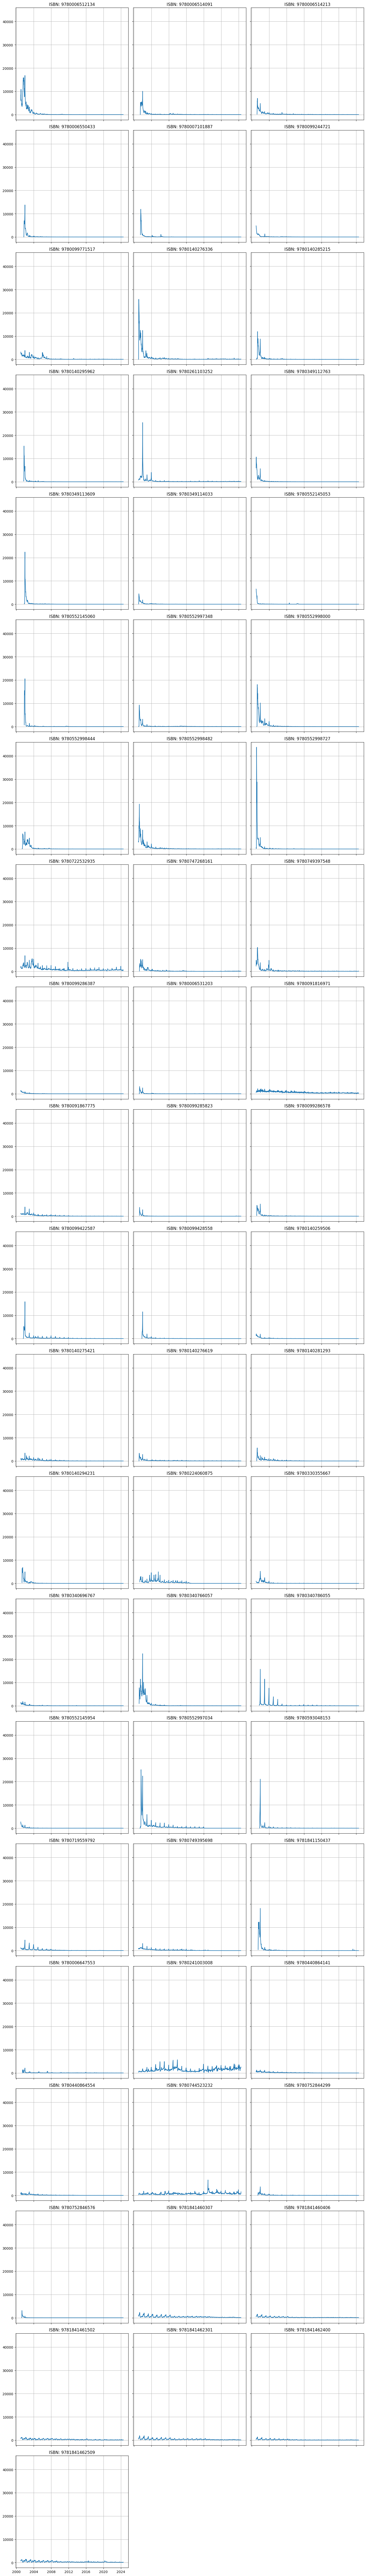

In [ ]:
# A plot for all the 61 unique ISBN's identified
# 1. Convert 'End Date' to datetime objects
df_UK_weekly['End Date'] = pd.to_datetime(df_UK_weekly['End Date'])

# 2. Define the cutoff date
cutoff_date = pd.to_datetime('2024-07-01')

# 3. Group by ISBN and filter for those with data beyond the cutoff
grouped_by_isbn = df_UK_weekly.groupby('ISBN')
isbn_with_sales_beyond_cutoff = grouped_by_isbn.filter(lambda x: (x['End Date'] > cutoff_date).any())
unique_isbn_beyond_cutoff = isbn_with_sales_beyond_cutoff['ISBN'].unique()

# 4. Loop through each of these ISBNs and plot the sales data
num_isbns = len(unique_isbn_beyond_cutoff)
rows = (num_isbns + 2) // 3  # Adjust layout for better readability
cols = min(num_isbns, 3)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, isbn in enumerate(unique_isbn_beyond_cutoff):
    isbn_data = df_UK_weekly[df_UK_weekly['ISBN'] == isbn].sort_values(by='End Date')
    axes[i].plot(isbn_data['End Date'], isbn_data['Volume'])
    axes[i].set_title(f'ISBN: {isbn}')
    axes[i].grid(True)

# Remove any unused subplots
if num_isbns < rows * cols:
    for j in range(num_isbns, rows * cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# 5. Identify patterns by comparing year 1-12 vs year 12-24
print("\nPattern Analysis (Year 1-12 vs Year 12-24):")
current_date = pd.to_datetime('2025-05-07')

for isbn in unique_isbn_beyond_cutoff:
    isbn_data = df_UK_weekly[df_UK_weekly['ISBN'] == isbn].sort_values(by='End Date').copy()
    if not isbn_data.empty:
        first_sale_date = isbn_data['End Date'].min()
        isbn_data['Years Since First Sale'] = (isbn_data['End Date'] - first_sale_date).dt.days / 365.25

        twelve_years = 12
        twenty_four_years = 24

        data_year_1_to_12 = isbn_data[(isbn_data['Years Since First Sale'] >= 0) & (isbn_data['Years Since First Sale'] < twelve_years)]
        data_year_12_to_24 = isbn_data[(isbn_data['Years Since First Sale'] >= twelve_years) & (isbn_data['Years Since First Sale'] < twenty_four_years)]

        avg_volume_1_to_12 = data_year_1_to_12['Volume'].mean() if not data_year_1_to_12.empty else None
        avg_volume_12_to_24 = data_year_12_to_24['Volume'].mean() if not data_year_12_to_24.empty else None

        print(f"\nISBN: {isbn}")
        if avg_volume_1_to_12 is not None:
            print(f"  Average Volume (Years 1-12): {avg_volume_1_to_12:.2f}")
        else:
            print("  Insufficient data for Years 1-12.")

        if avg_volume_12_to_24 is not None:
            print(f"  Average Volume (Years 12-24): {avg_volume_12_to_24:.2f}")
        else:
            print("  Insufficient data for Years 12-24.")

        if avg_volume_1_to_12 is not None and avg_volume_12_to_24 is not None:
            percentage_change = ((avg_volume_12_to_24 - avg_volume_1_to_12) / avg_volume_1_to_12) * 100
            print(f"  Percentage Change in Average Volume (Year 1-12 to Year 12-24): {percentage_change:.2f}%")


Pattern Analysis (Year 1-12 vs Year 12-24):

ISBN: 9780006512134
  Average Volume (Years 1-12): 1239.91
  Average Volume (Years 12-24): 4.54
  Percentage Change in Average Volume (Year 1-12 to Year 12-24): -99.63%

ISBN: 9780006514091
  Average Volume (Years 1-12): 426.22
  Average Volume (Years 12-24): 23.36
  Percentage Change in Average Volume (Year 1-12 to Year 12-24): -94.52%

ISBN: 9780006514213
  Average Volume (Years 1-12): 390.68
  Average Volume (Years 12-24): 28.41
  Percentage Change in Average Volume (Year 1-12 to Year 12-24): -92.73%

ISBN: 9780006550433
  Average Volume (Years 1-12): 310.82
  Average Volume (Years 12-24): 2.98
  Percentage Change in Average Volume (Year 1-12 to Year 12-24): -99.04%

ISBN: 9780007101887
  Average Volume (Years 1-12): 351.35
  Average Volume (Years 12-24): 0.91
  Percentage Change in Average Volume (Year 1-12 to Year 12-24): -99.74%

ISBN: 9780099244721
  Average Volume (Years 1-12): 177.52
  Average Volume (Years 12-24): 4.54
  Percentag

- An analysis shows that nearly all ISBN's have seen a significant reduction in sales from the first 12 year to the next 12 year phase.
- Book sales generally decline with time as popularity and interest fades.
- However, there are certain books that can buck this trend, this may be due to factors including use in educational settings such as literature books, new editions or subsequent books in the series and reignite interest in the first/original books. Similarly books that may have been converted into blockbuster films can also see an increase in book sales.
- There are just 2 unique ISBN's which have seen an increase in sales in the next 12 year phase (**ISBN: 9780241003008** and **ISBN: 9780744523232**)

In [ ]:
# Selecting the two book titles 'The Very Hungry Caterpillar' and 'The Alchemist' for further analysis
# 1. Convert 'End Date' to datetime objects
df_UK_weekly['End Date'] = pd.to_datetime(df_UK_weekly['End Date'])

# 2. Define the start date for the analysis
start_date_analysis = pd.to_datetime('2012-01-01')

# 3. List the titles of the books you want to analyze
selected_titles = ['Alchemist, The', 'Very Hungry Caterpillar, The']

# Assuming your DataFrame has a 'Title' column. If not, replace with the correct column.
filtered_df = df_UK_weekly[df_UK_weekly['Title'].isin(selected_titles)].copy()

# 4. Filter data for the specified period
analysis_df = filtered_df[filtered_df['End Date'] >= start_date_analysis].sort_values(by='End Date')

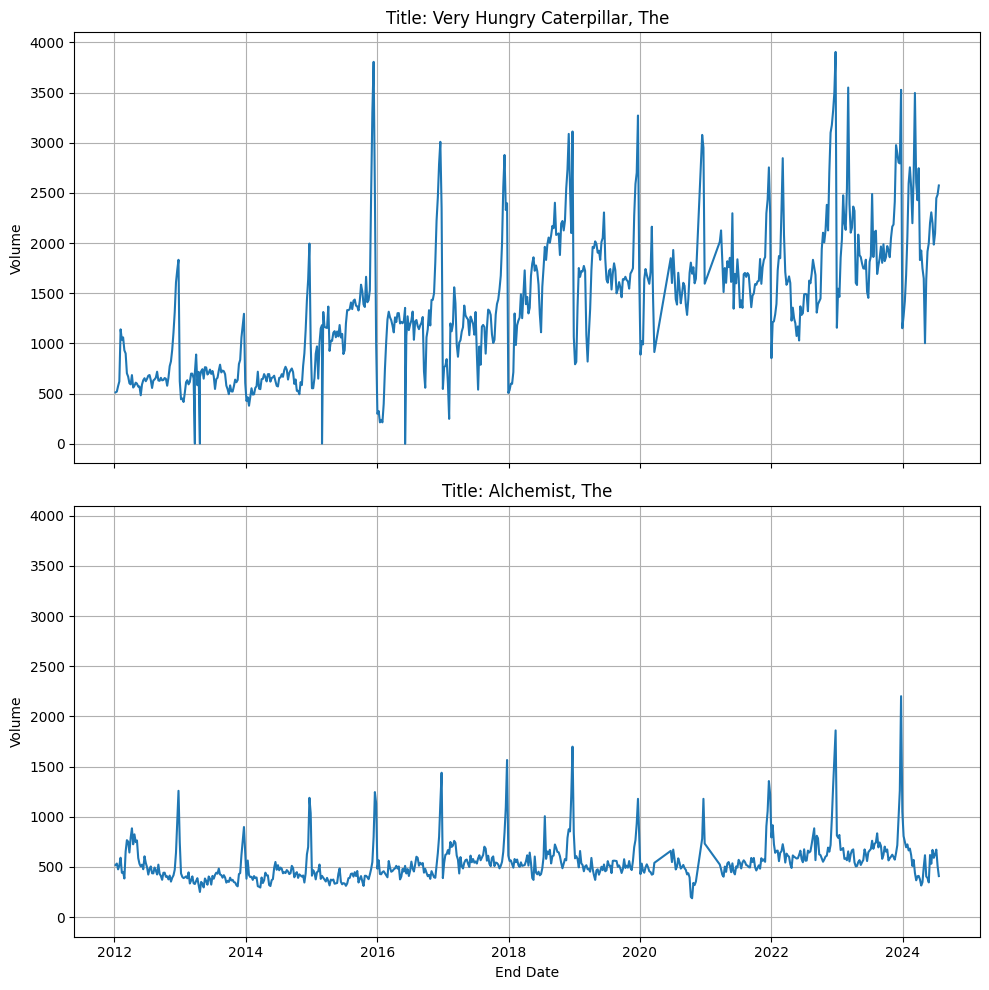

In [ ]:
# 5. Plot the sales data for each book
unique_titles = analysis_df['Title'].unique()
num_titles = len(unique_titles)
fig, axes = plt.subplots(num_titles, 1, figsize=(10, 5 * num_titles), sharex=True, sharey=True)
axes = axes.flatten() if num_titles > 1 else [axes]  # Ensure axes is always a list for iteration

for i, title in enumerate(unique_titles):
    book_data = analysis_df[analysis_df['Title'] == title]
    axes[i].plot(book_data['End Date'], book_data['Volume'])
    axes[i].set_title(f'Title: {title}')
    axes[i].set_ylabel('Volume')
    axes[i].grid(True)

plt.xlabel('End Date')
plt.tight_layout()
plt.show()

In [ ]:
# 6. Basic descriptive statistics for the period
print("\nDescriptive Statistics (Volume) for the period > 2012-01-01:")
print(analysis_df.groupby('Title')['Volume'].describe())


Descriptive Statistics (Volume) for the period > 2012-01-01:
                              count         mean         std    min     25%  \
Title                                                                         
Alchemist, The                628.0   550.807325  204.157129  187.0  427.75   
Very Hungry Caterpillar, The  632.0  1398.000000  674.350784   -1.0  776.00   

                                 50%      75%     max  
Title                                                  
Alchemist, The                 513.0   613.00  2201.0  
Very Hungry Caterpillar, The  1354.5  1795.25  3905.0  


In [ ]:
# 7. Identify the most recent data point for each book
most_recent_data = analysis_df.groupby('Title')['End Date'].max().reset_index()
print("\nMost Recent Data Point (End Date) for each book:")
print(most_recent_data)


Most Recent Data Point (End Date) for each book:
                          Title   End Date
0                Alchemist, The 2024-07-20
1  Very Hungry Caterpillar, The 2024-07-20


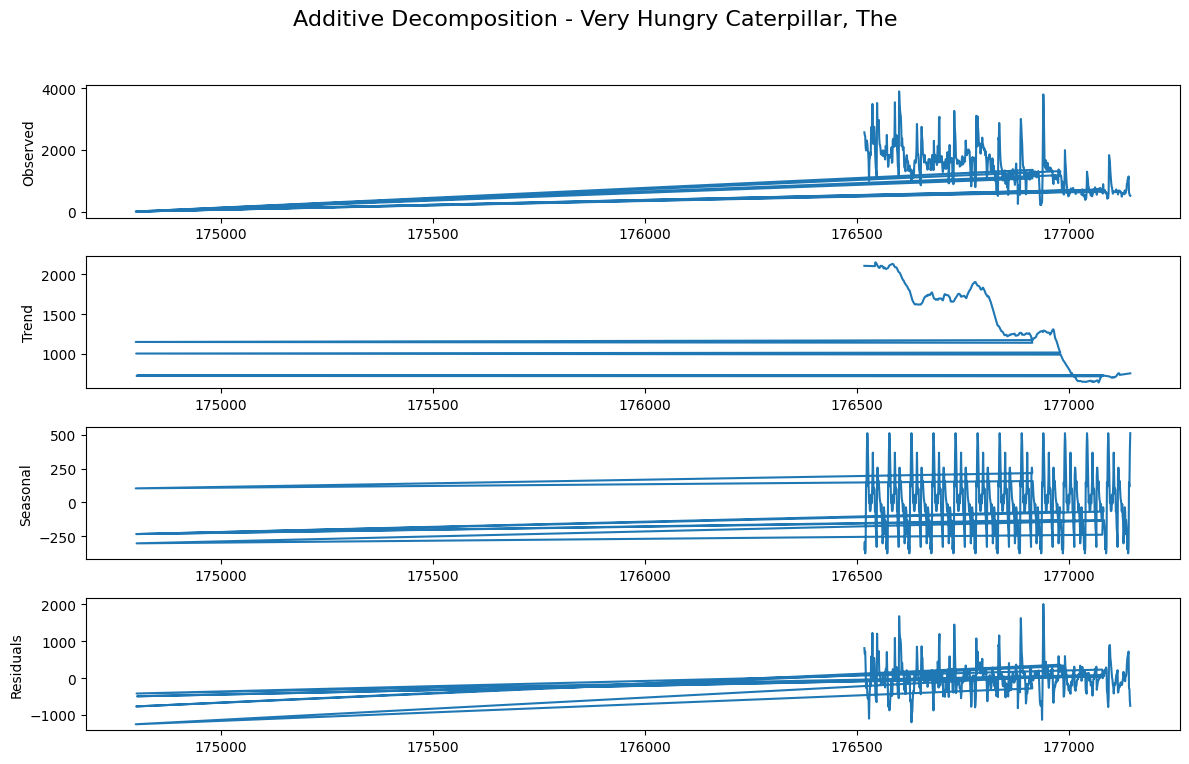

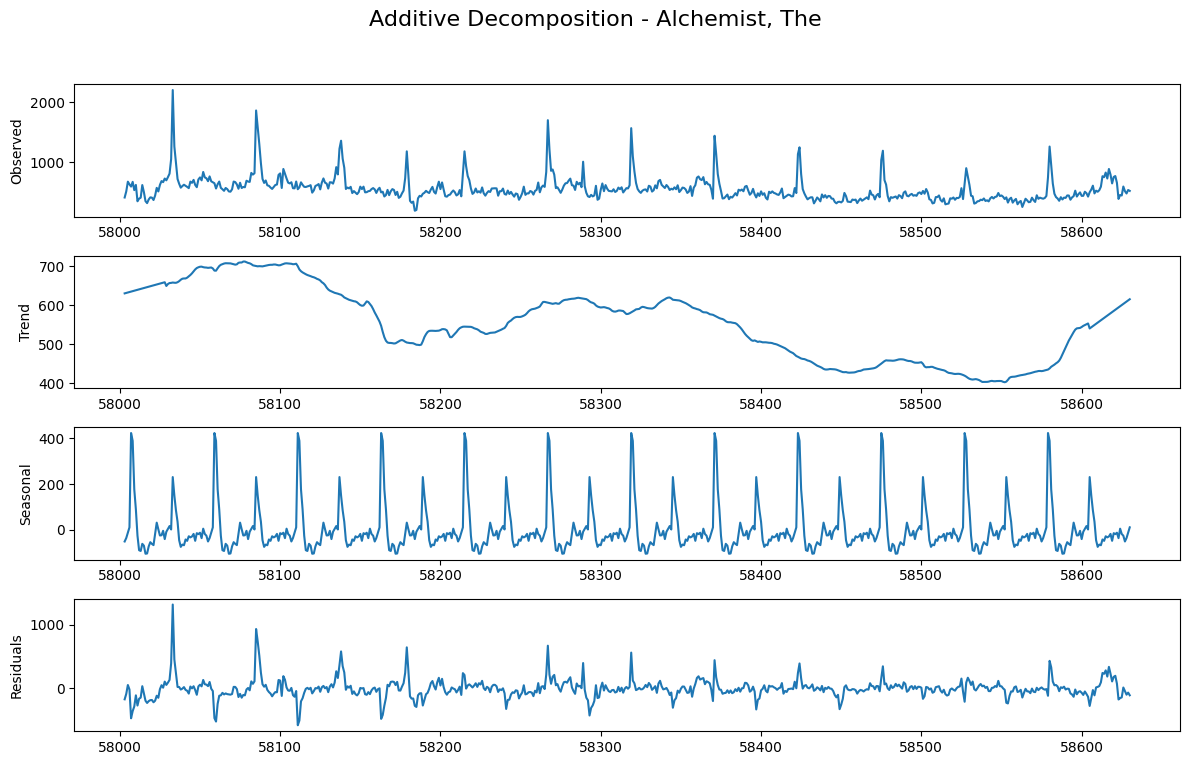

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

for title in unique_titles:
    book_data = analysis_df[analysis_df['Title'] == title]['Volume']

    seasonal_period = 52 # Weekly data and annual seasonality

    # Try additive decomposition
    try:
        decomposition_add = seasonal_decompose(book_data, model='additive', period=seasonal_period, extrapolate_trend='freq')
        fig, axes = plt.subplots(4, 1, figsize=(12, 8))
        fig.suptitle(f'Additive Decomposition - {title}', fontsize=16)
        decomposition_add.observed.plot(ax=axes[0], legend=False)
        axes[0].set_ylabel('Observed')
        decomposition_add.trend.plot(ax=axes[1], legend=False)
        axes[1].set_ylabel('Trend')
        decomposition_add.seasonal.plot(ax=axes[2], legend=False)
        axes[2].set_ylabel('Seasonal')
        decomposition_add.resid.plot(ax=axes[3], legend=False)
        axes[3].set_ylabel('Residuals')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    except Exception as e:
        print(f"Error during additive decomposition for {title}: {e}")

- The plots shows relatively similar pattern of seasonality and magnitude/amplitude over a time for The Alchemist book data. There are also multiple peaks and troughs with a consistent height over a long time period This would suggest an additive decomposition would be suitable.
- Multiplicative decomposition is not appropriate for zero or negative values.

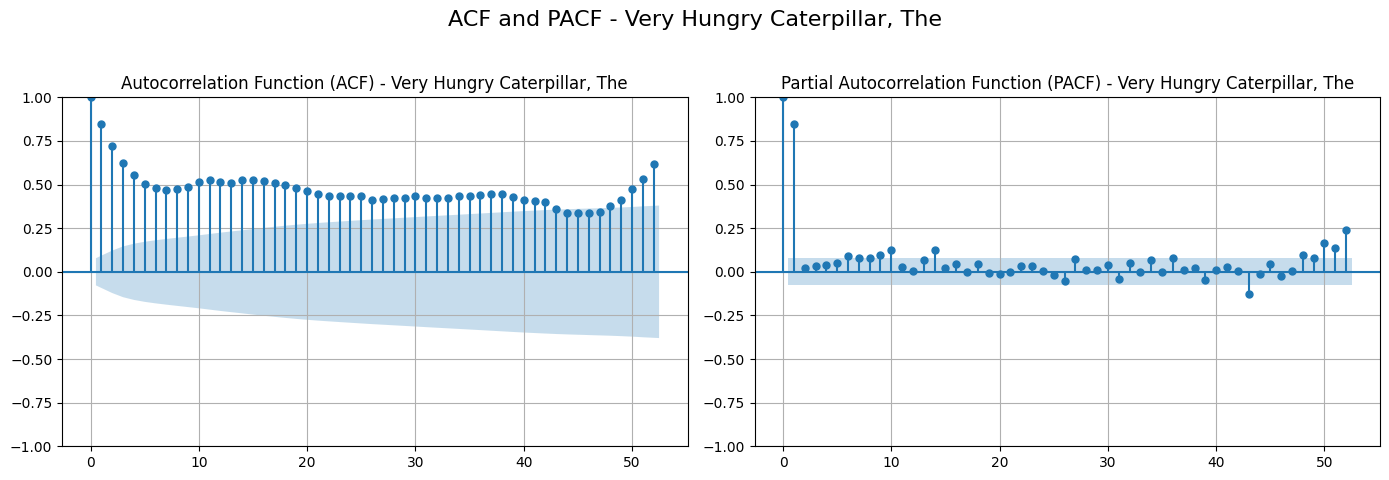

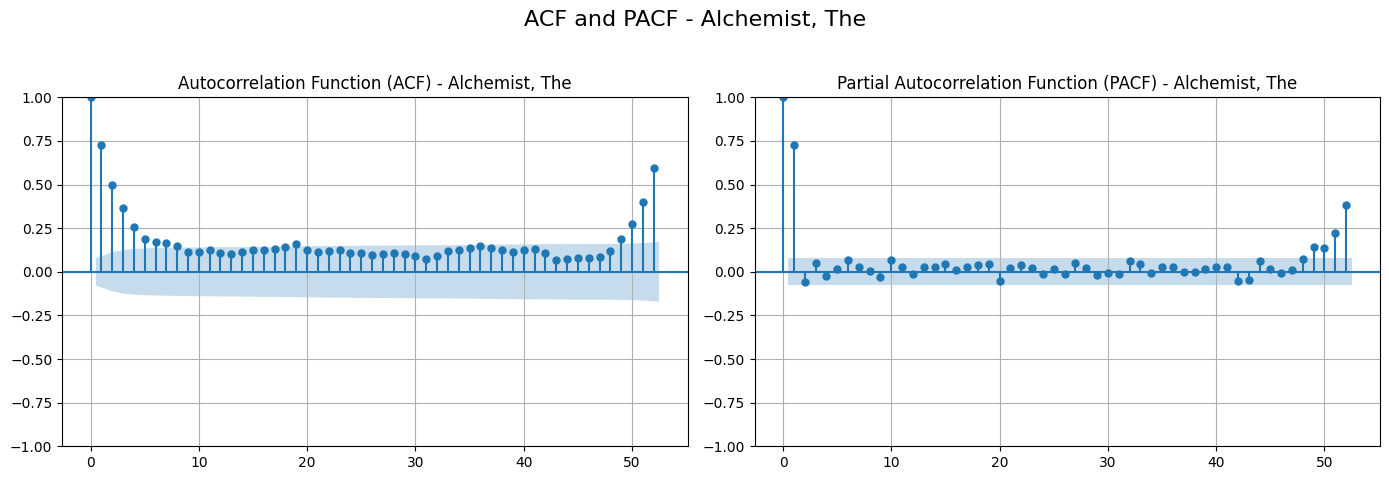

In [ ]:
# Plotting acf & pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

lags = 52 # Due to weekly data

for title in unique_titles:
    book_data = analysis_df[analysis_df['Title'] == title]['Volume'].dropna() # Handle potential NaNs

    if not book_data.empty:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'ACF and PACF - {title}', fontsize=16)

        # Plot ACF
        plot_acf(book_data, lags=lags, ax=axes[0], title=f'Autocorrelation Function (ACF) - {title}')
        axes[0].grid(True)

        # Plot PACF
        plot_pacf(book_data, lags=lags, ax=axes[1], title=f'Partial Autocorrelation Function (PACF) - {title}', method='ywmle') # Using ywmle method for PACF
        axes[1].grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print(f"No valid data to plot ACF and PACF for '{title}'.")

**ACF:**
- For The Very Hungry Caterpillar shows a slow decline. The spikes are significantly above the 95% CI. This suggests that current value is significantly correlated to past values suggesting a potential trend or non-stationarity in the data.
- For The Alchemist, the decay happens quickly and most are within the blue shaded region hence correlation drops of rapidly.

**PACF**
- For both books, there is a sharp cut-off after the first lag which may be a strong indicator of an Autoregressive model.

In [ ]:
# Checking for Stationarity
from statsmodels.tsa.stattools import adfuller

print("Augmented Dickey-Fuller (ADF) Test for Stationarity:")
for title in unique_titles:
    book_data = analysis_df[analysis_df['Title'] == title]['Volume'].dropna()

    if not book_data.empty:
        print(f"\nResults for '{title}':")
        adf_result = adfuller(book_data)

        print(f"  ADF Statistic: {adf_result[0]:.3f}")
        print(f"  p-value: {adf_result[1]:.3f}")
        print("  Critical Values:")
        for key, value in adf_result[4].items():
            print(f"   {key}: {value:.3f}")
    else:
        print(f"\nNo valid data to perform ADF test for '{title}'.")

Augmented Dickey-Fuller (ADF) Test for Stationarity:

Results for 'Very Hungry Caterpillar, The':
  ADF Statistic: -2.228
  p-value: 0.196
  Critical Values:
   1%: -3.441
   5%: -2.866
   10%: -2.569

Results for 'Alchemist, The':
  ADF Statistic: -9.793
  p-value: 0.000
  Critical Values:
   1%: -3.441
   5%: -2.866
   10%: -2.569


For The Very Hungry Caterpillar:
- The p-value is greater than 0.05, so we fail to reject the null hypothesis.
- This suggests that the sales data for this book is likely non-stationary, indicating the presence of a trend or other time-dependent structure.
- We may need to apply differencing to make the data stationary.
- For non-stationary data, models like ARIMA may be more appropriate to use as the intergration (I) allows for differencing.

For The Alchemist:
- The p-value is less than or equal to 0.05, so we reject the null hypothesis.
- This suggests that the sales data for this book is likely stationary.

# MODELLING WITH ARIMA


Performing Auto-ARIMA for 'Very Hungry Caterpillar, The':
  Training data from: 2012-01-07 00:00:00 to 2023-12-09 00:00:00
  Forecast horizon: 2023-12-16 00:00:00 to 2024-07-20 00:00:00 (32 weeks)
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=8360.959, Time=0.25 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=7944.444, Time=28.19 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=8027.239, Time=23.88 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=8393.925, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=8029.610, Time=0.53 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=49.25 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=7928.086, Time=11.57 sec
 ARIMA(0,0,0)(0,1,1)[52] intercept   : AIC=8268.986, Time=9.01 sec
 ARIMA(2,0,0)(0,1,1)[52] intercept   : AIC=7929.501, Time=15.78 sec
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=7929.398, Time=17.61 sec
 ARIMA(2,0,1)(0,1,1)[52] intercept   : AIC=7931.668, Time=34.53 sec
 ARIMA(1,0,0)(0,1,1)

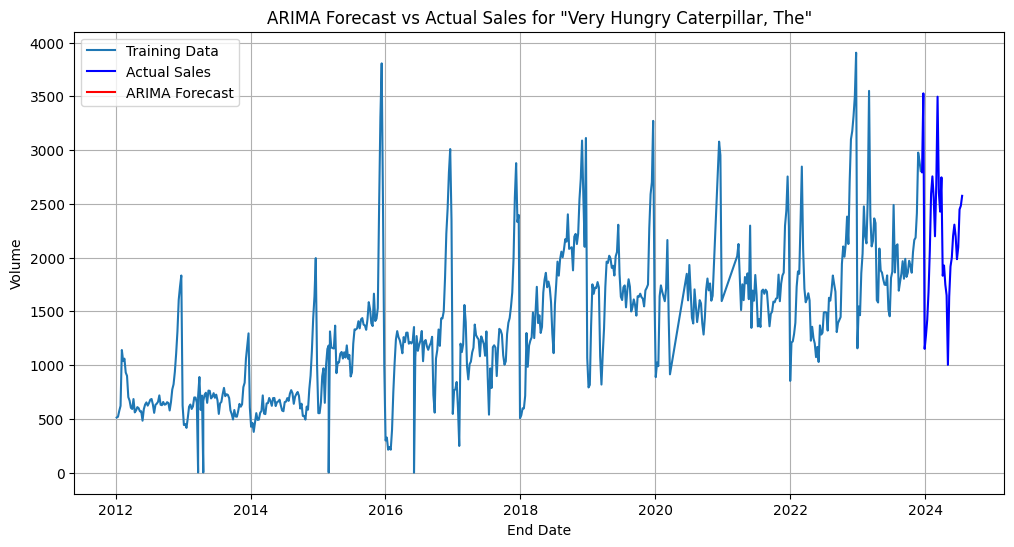


Performing Auto-ARIMA for 'Alchemist, The':
  Training data from: 2012-01-07 00:00:00 to 2023-12-09 00:00:00
  Forecast horizon: 2023-12-16 00:00:00 to 2024-07-20 00:00:00 (32 weeks)
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=6779.128, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=6728.970, Time=4.83 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=6710.893, Time=17.67 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=6736.552, Time=0.33 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=inf, Time=29.97 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=6714.186, Time=4.49 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=6746.963, Time=12.00 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=6664.790, Time=28.60 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=6693.070, Time=0.91 sec
 ARIMA(1,1,1)(1,1,1)[52]             : AIC=inf, Time=80.52 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=6668.306, Time=19.49 sec
 ARIMA(1,1,0)(0,1,1)[52]             : A

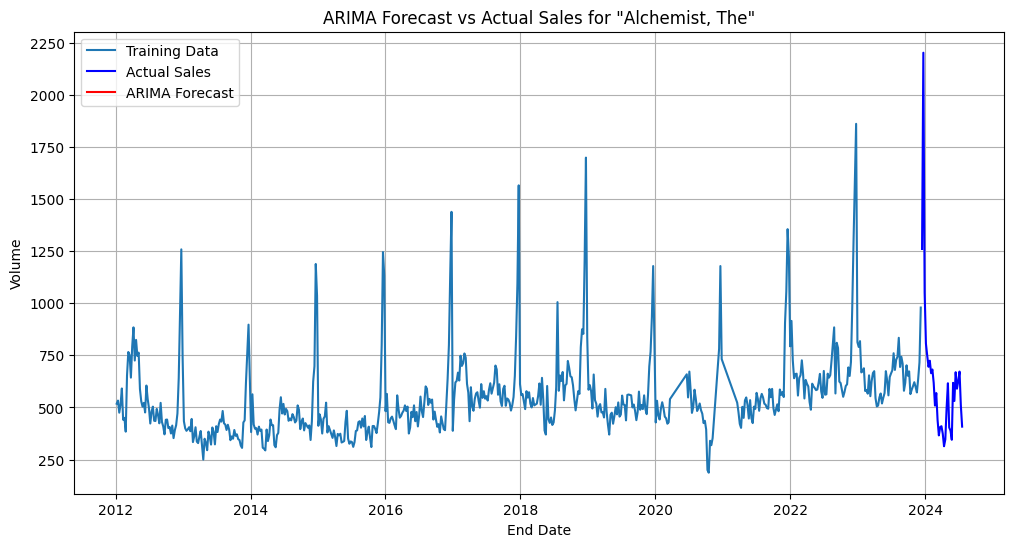

In [ ]:
# Performing auto-ARIMA on both selected book titles
from pmdarima import auto_arima

start_date_training = pd.to_datetime('2012-01-01')
selected_titles = ['Very Hungry Caterpillar, The', 'Alchemist, The']
analysis_df = df_UK_weekly[df_UK_weekly['Title'].isin(selected_titles)].copy()
analysis_df.set_index('End Date', inplace=True)
analysis_df = analysis_df[analysis_df.index >= start_date_training]
analysis_df = analysis_df.sort_index()

forecast_horizon = 32

unique_titles = analysis_df['Title'].unique()

for title in unique_titles:
    book_data = analysis_df[analysis_df['Title'] == title]['Volume'].dropna()

    if len(book_data) > forecast_horizon:
        train_data = book_data[:-forecast_horizon]
        test_data = book_data[-forecast_horizon:]

        print(f"\nPerforming Auto-ARIMA for '{title}':")
        print(f"  Training data from: {train_data.index.min()} to {train_data.index.max()}")
        print(f"  Forecast horizon: {test_data.index.min()} to {test_data.index.max()} ({len(test_data)} weeks)")

        try:
            # Setting reasonable bounds for p, d, q, P, D, Q
            # Adjusted and values constrained due to high computing power required (crashing) from initial runs with larger MAX values.
            model = auto_arima(train_data,
                               seasonal=True,
                               m=52,  # yearly seasonality
                               start_p=0, max_p=3,
                               start_q=0, max_q=3,
                               start_P=0, max_P=1,
                               start_Q=0, max_Q=1,
                               d=None,
                               D=1,
                               stepwise=True,
                               trace=True,
                               suppress_warnings=True,
                               error_action='ignore')

            print(f"\nBest ARIMA model for '{title}': ARIMA{model.order}x{model.seasonal_order}")

            # Make predictions on the test set
            predictions = model.predict(n_periods=forecast_horizon)
            predictions_df = pd.Series(predictions, index=test_data.index)

            # Evaluate the model
            from sklearn.metrics import mean_squared_error
            rmse = mean_squared_error(test_data, predictions, squared=False)
            print(f"  Root Mean Squared Error (RMSE) on the test set: {rmse:.2f}")

            # Plot the results
            import matplotlib.pyplot as plt
            plt.figure(figsize=(12, 6))
            plt.plot(train_data, label='Training Data')
            plt.plot(test_data, label='Actual Sales', color='blue')
            plt.plot(predictions_df, label='ARIMA Forecast', color='red')
            plt.title(f'ARIMA Forecast vs Actual Sales for "{title}"')
            plt.xlabel('End Date')
            plt.ylabel('Volume')
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            print(f"Error during Auto-ARIMA for '{title}': {e}")

    else:
        print(f"Insufficient data for '{title}' to perform forecasting with a {forecast_horizon}-week horizon.")

**Comments**
- The order of the ARIMA for The Alchemist is higher than that of The Very Hungry Caterpillar. This suggest that the may be more complexity associated with forecasting for The Alchemist compared to the other book title.
- Similarly, there are generally lower AICs within The Alchemist than with The Very Hungry Caterpillar. This would suggest a slightly better balance between model fit and complexity.
- "The Alchemist" was best modeled using ARIMA(1, 1, 1)(0, 1, 1)[52], indicating the presence of both non-seasonal and seasonal differencing. This model achieved a Root Mean Squared Error (RMSE) of 184.07 on the test set, suggesting a relatively strong forecasting performance.

- "The Very Hungry Caterpillar" was best fitted by a simpler model, ARIMA(1, 0, 0)(0, 1, 1)[52], which implies the series did not require non-seasonal differencing but exhibited clear seasonal behaviour. However, it had a notably higher RMSE of 433.04, indicating less accurate forecasts compared to The Alchemist.



Residual Analysis for 'Very Hungry Caterpillar, The':

Residual Statistics (Training Data):
count     600.000000
mean       97.052288
std       351.409268
min     -1367.921974
25%       -75.588578
50%        69.310862
75%       259.921967
max      1563.708630
dtype: float64


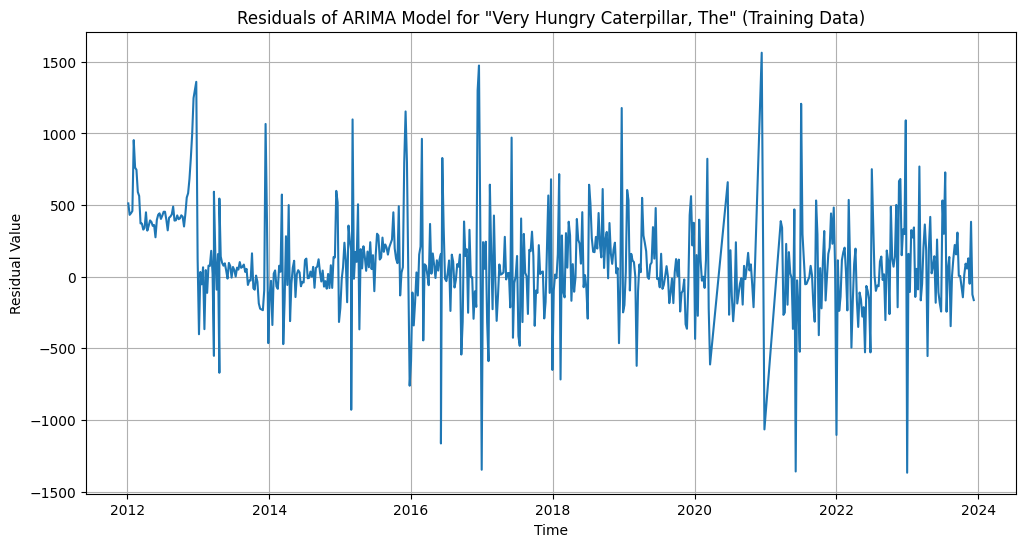

<Figure size 1200x500 with 0 Axes>

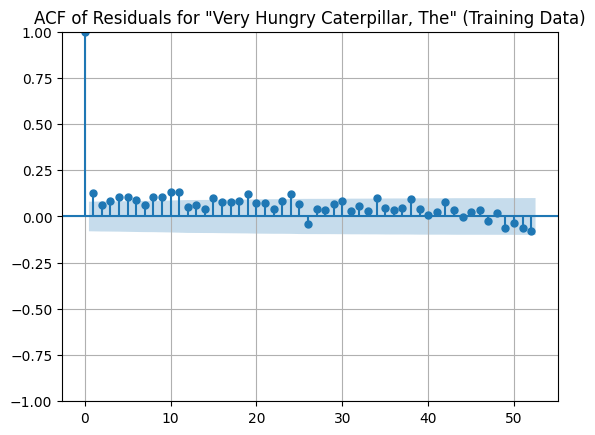



Residual Analysis for 'Alchemist, The':

Residual Statistics (Training Data):
count    596.000000
mean       2.721869
std      116.549815
min     -569.333884
25%      -51.366108
50%        2.253569
75%       56.338770
max      530.343257
dtype: float64


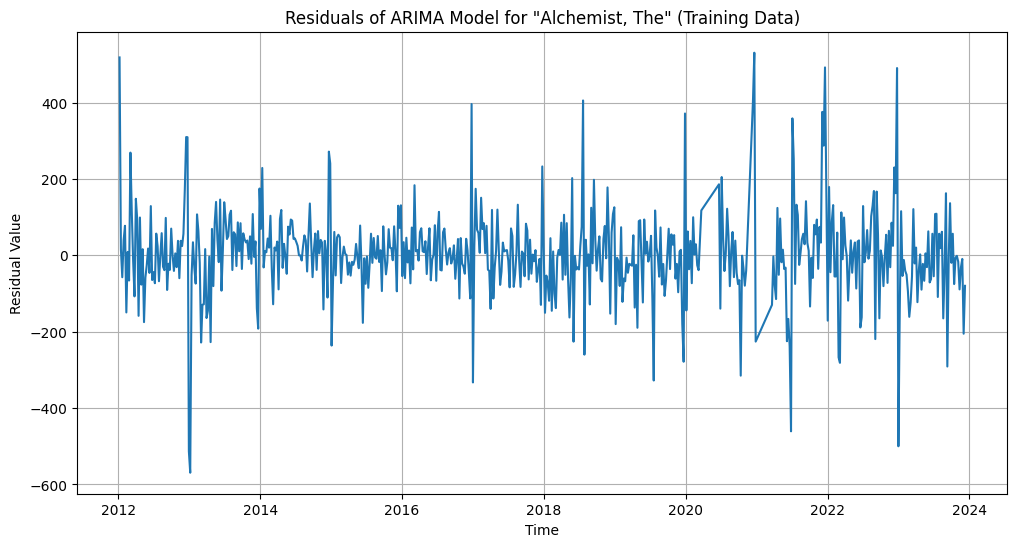

<Figure size 1200x500 with 0 Axes>

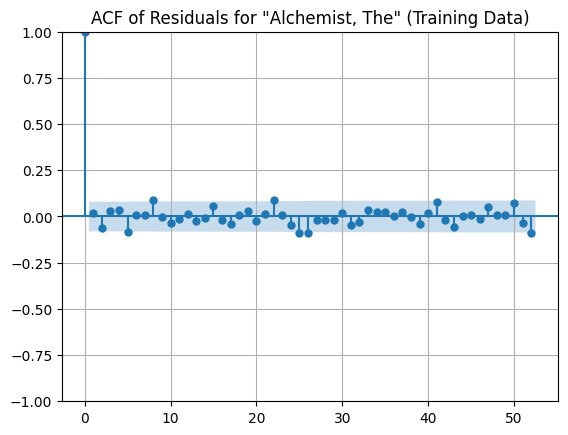

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

best_models = {
    'Very Hungry Caterpillar, The': {'order': (1, 0, 0), 'seasonal_order': (0, 1, 1, 52)},
    'Alchemist, The': {'order': (1, 1, 1), 'seasonal_order': (0, 1, 1, 52)},
}

for title in unique_titles:
    print(f"\n\nResidual Analysis for '{title}':")
    book_data = analysis_df[analysis_df['Title'] == title]['Volume'].dropna()
    train_data = book_data[:-forecast_horizon]

    # Get the best model parameters for the current title
    order = best_models[title]['order']
    seasonal_order = best_models[title]['seasonal_order']

    # Fit the SARIMAX model with the specified order and seasonal order
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)  # Suppress convergence output

    # Calculate residuals
    residuals = model_fit.resid

    # Print some descriptive statistics of the residuals
    print("\nResidual Statistics (Training Data):")
    print(residuals.describe())

    # Visualise the residuals
    plt.figure(figsize=(12, 6))
    plt.plot(residuals)
    plt.title(f'Residuals of ARIMA Model for "{title}" (Training Data)')
    plt.xlabel('Time')
    plt.ylabel('Residual Value')
    plt.grid(True)
    plt.show()

    # Plot the ACF of the residuals to check for remaining autocorrelation
    plt.figure(figsize=(12, 5))
    plot_acf(residuals, lags=52, title=f'ACF of Residuals for "{title}" (Training Data)')
    plt.grid(True)
    plt.show()

**Comments on Residuals**

- For the Alchemist residuals, the Mean is close to Zero. This indicates that the model is not systematically over- or under-predicting the values.
- There is quite a bit of variance of the residuals for both plots and this is not uniform.
- The ACF plots for both show that there is No Autocorrelation. Most of the spikes fall within the confidence interval.
Good Model Fit: If the residuals exhibit the properties mentioned above (mean close to zero, constant variance, no significant autocorrelation), it suggests that the ARIMA model has captured the underlying patterns in the sales data reasonably well. The errors are essentially random noise.
Model Misspecification: If the residuals show:
- The Very Hungry Caterpillar has a non-zero mean suggesting the model might be systematically biased. The model's forecast error is not consistent over time, which can affect the reliability of confidence intervals.



Forecasting for: Very Hungry Caterpillar, The


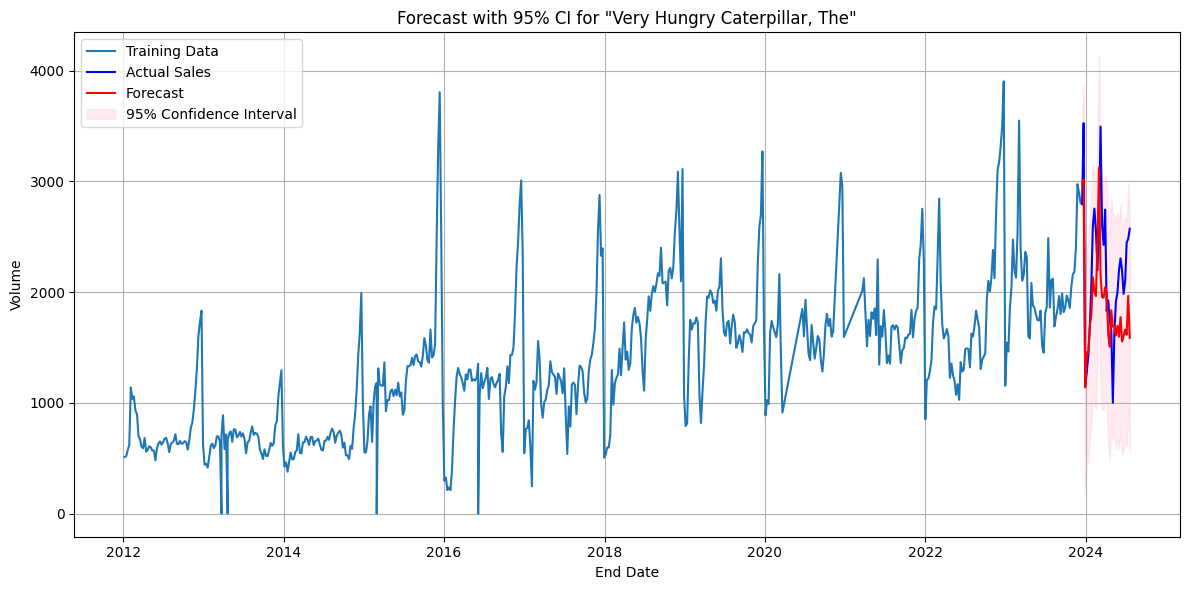

RMSE for 'Very Hungry Caterpillar, The': 528.14

Forecasting for: Alchemist, The


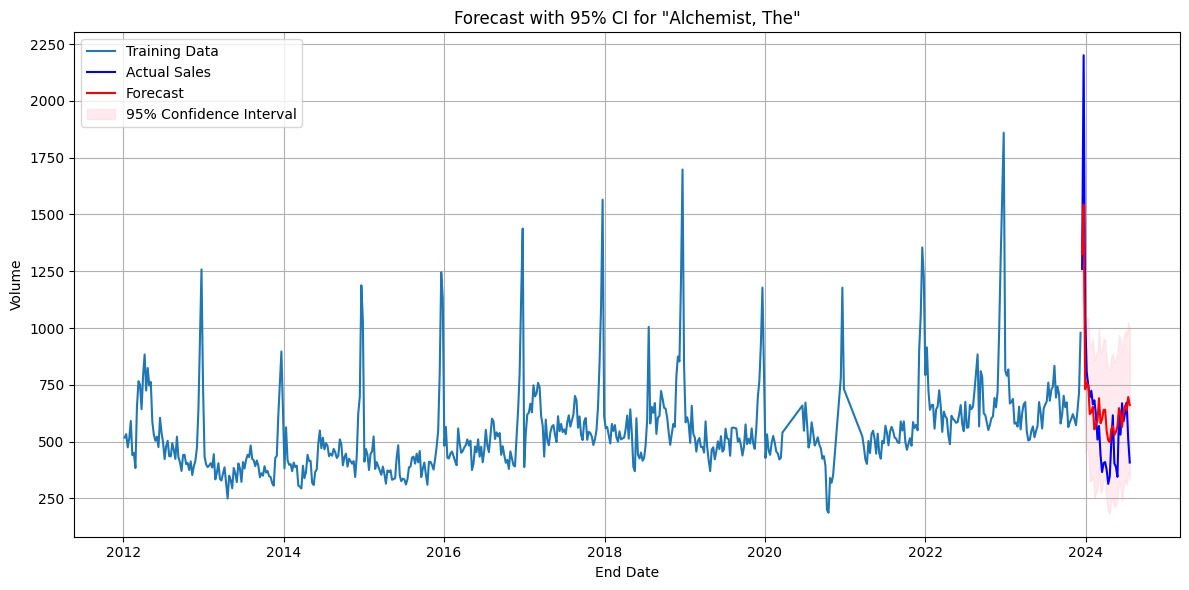

RMSE for 'Alchemist, The': 183.89


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

forecast_horizon = 32

for title in best_models:
    print(f"\nForecasting for: {title}")

    # Get data
    book_data = analysis_df[analysis_df['Title'] == title]['Volume'].dropna().sort_index()

    if len(book_data) > forecast_horizon:
        train_data = book_data[:-forecast_horizon]
        test_data = book_data[-forecast_horizon:]

        order = best_models[title]['order']
        seasonal_order = best_models[title]['seasonal_order']

        # Fit SARIMAX model with training data
        model = SARIMAX(train_data,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)

        # Forecast
        forecast_results = results.get_forecast(steps=forecast_horizon)
        forecast = forecast_results.predicted_mean
        conf_int = forecast_results.conf_int()
        forecast_index = test_data.index

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(train_data, label='Training Data')
        plt.plot(test_data, label='Actual Sales', color='blue')
        plt.plot(forecast_index, forecast, label='Forecast', color='red')
        plt.fill_between(forecast_index,
                         conf_int.iloc[:, 0],
                         conf_int.iloc[:, 1],
                         color='pink', alpha=0.3, label='95% Confidence Interval')
        plt.title(f'Forecast with 95% CI for "{title}"')
        plt.xlabel('End Date')
        plt.ylabel('Volume')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # RMSE
        rmse = mean_squared_error(test_data, forecast, squared=False)
        print(f"RMSE for '{title}': {rmse:.2f}")

    else:
        print(f"Not enough data for '{title}' to forecast {forecast_horizon} weeks.")

**Interpreting the Results and Assessing Model Predictions**

- Both forecasts follow Trend and Seasonality: The forecast line generally follows the historical trend and seasonal patterns.

- There is a reasonable width of Confidence Intervals.

- The forecast for The Very Hungry Caterpillar show that initially the predictions were a lot more accurate and closely aligned with the actual values. Hopefully, the further the predictions when in time, the less accurate they became. They were still within the CI.
- This is also similar for the Alchemist, with the precictions not capturing the true height/depths of the peaks/troughs of the actual values suggesting potentially more conservative predictions.

# MACHINE LEARNING MODELLING
# 1. XG BOOST

In [ ]:
import subprocess
import sys

def install_xgboost():
    """
    Installs the xgboost library using pip.
    """
    try:
        # Install xgboost
        print("Installing xgboost...")
        subprocess.run([sys.executable, '-m', 'pip', 'install', 'xgboost'], check=True, capture_output=True)
        print("xgboost has been successfully installed.")

    except subprocess.CalledProcessError as e:
        print(f"Error installing xgboost: {e}")
        print("Please make sure pip is installed and try again.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        sys.exit(1)

if __name__ == '__main__':
    install_xgboost()

    import xgboost as xgb
    print(f"xgboost is installed. Version: {xgb.__version__}")

Installing xgboost...
xgboost has been successfully installed.
xgboost is installed. Version: 3.0.0


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

start_date_training = pd.to_datetime('2012-01-01')
selected_titles = ['Very Hungry Caterpillar, The', 'Alchemist, The']
analysis_df = df_UK_weekly[df_UK_weekly['Title'].isin(selected_titles)].copy()
analysis_df.set_index('End Date', inplace=True)
analysis_df = analysis_df[analysis_df.index >= start_date_training]
analysis_df = analysis_df.sort_index()

forecast_horizon = 32

In [ ]:
def create_features(df, window_length):
    """
    Creates lagged features and a target variable from the time series data.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data ('Volume').
        window_length (int): The number of lagged periods to include as features.

    Returns:
        pd.DataFrame: A DataFrame with lagged features and the target variable ('Target').
    """
    df_features = df.copy()
    for i in range(1, window_length + 1):
        df_features[f'Lag_{i}'] = df_features['Volume'].shift(i)
    df_features['Target'] = df_features['Volume'].shift(-1)  # Target is the next period's volume
    df_features = df_features.dropna()  # Drop rows with NaN due to lagging
    return df_features

def prepare_data_for_xgboost(df, window_length, forecast_horizon):
    """
    Prepares data for XGBoost modeling, including feature engineering and train/test split.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data.
        window_length (int): The number of lagged periods to include as features.
        forecast_horizon (int): The number of periods to forecast.

    Returns:
        tuple: A tuple containing:
            - X_train (pd.DataFrame): Training features.
            - y_train (pd.Series): Training target variable.
            - X_test (pd.DataFrame): Testing features.
            - y_test (pd.Series): Testing target variable.
            - feature_names (list): List of feature names.
    """
    df_featured = create_features(df, window_length)
    X = df_featured.drop('Target', axis=1)
    y = df_featured['Target']

    # Ensure enough data for the forecast horizon
    if len(y) <= forecast_horizon:
        raise ValueError(f"Insufficient data for a forecast horizon of {forecast_horizon}.  Need at least {forecast_horizon + 1} data points.")

    X_train = X.iloc[:-forecast_horizon]
    y_train = y.iloc[:-forecast_horizon]
    X_test = X.iloc[-forecast_horizon:]
    y_test = y.iloc[-forecast_horizon:]
    feature_names = list(X.columns)  # Get feature names
    return X_train, y_train, X_test, y_test, feature_names


unique_titles = analysis_df['Title'].unique()

for title in unique_titles:
    book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()

    print(f"\nTraining XGBoost model for '{title}':")

    try:
        # Parameter grid for tuning XGBoost hyperparameters.
        param_grid = {
            'xgb__n_estimators': [100, 200, 300],
            'xgb__learning_rate': [0.01, 0.05, 0.1],
            'xgb__max_depth': [3, 4, 5],
            'xgb__subsample': [0.7, 0.8, 0.9],
            'xgb__colsample_bytree': [0.7, 0.8, 0.9],
        }

        # Define the pipeline with scaler and XGBoost regressor.
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
        ])

        # Use TimeSeriesSplit for cross-validation.
        tscv = TimeSeriesSplit(n_splits=5)

        # Create a wrapper function for GridSearchCV
        def grid_search_wrapper(window_length):
            """
            A wrapper to pass window_length to the grid search process.
            """
            X_train, y_train, X_test, y_test, feature_names = prepare_data_for_xgboost(book_data, window_length, forecast_horizon)

            param_grid_local = {
                'xgb__n_estimators': [100, 200],
                'xgb__learning_rate': [0.01, 0.1],
                'xgb__max_depth': [3, 4],
                'xgb__subsample': [0.7, 0.8],
                'xgb__colsample_bytree': [0.7, 0.8],
            }
            grid_search = GridSearchCV(pipeline,
                                        param_grid_local, # Use the local param grid
                                        cv=tscv,
                                        scoring='neg_mean_squared_error',
                                        verbose=0,  # Reduced verbosity
                                        n_jobs=-1)
            grid_search.fit(X_train, y_train)
            return grid_search, X_test, y_test, feature_names

        # Perform grid search for different window lengths and choose the best one.
        best_rmse = float('inf')
        best_window_length = None
        best_model = None
        best_feature_names = None

        for window_length in [4, 8, 12, 26, 52]:
            print(f"\nEvaluating window length: {window_length} for '{title}'")
            grid_result, X_test, y_test, feature_names = grid_search_wrapper(window_length)
            predictions = grid_result.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            print(f"RMSE for window length {window_length}: {rmse:.2f}")

            if rmse < best_rmse:
                best_rmse = rmse
                best_window_length = window_length
                best_model = grid_result.best_estimator_
                best_feature_names = feature_names # capture

        print(f"\nBest window length for '{title}': {best_window_length}")
        print(f"Best RMSE for '{title}': {best_rmse:.2f}")
        best_params = best_model.get_params()
        print(f"Best parameters for '{title}': {best_params}")

        # Recreate X_test and y_test using the best_window_length to match training features
        _, _, X_test_final, y_test_final, _ = prepare_data_for_xgboost(book_data, best_window_length, forecast_horizon)

        # Now use the correct test set
        predictions = best_model.predict(X_test_final)
        rmse = np.sqrt(mean_squared_error(y_test_final, predictions))
        print(f"Root Mean Squared Error (RMSE) on the test set for '{title}': {rmse:.2f}")

        # Store the results
        results[title] = {
            'best_params': best_params,
            'rmse': rmse,
            'test_predictions': predictions,
            'y_test': y_test_final,
            'best_window_length': best_window_length,
            'best_feature_names': best_feature_names
        }

    except Exception as e:
        print(f"Error during XGBoost modeling for '{title}': {e}")




Training XGBoost model for 'Very Hungry Caterpillar, The':

Evaluating window length: 4 for 'Very Hungry Caterpillar, The'
RMSE for window length 4: 541.17

Evaluating window length: 8 for 'Very Hungry Caterpillar, The'
RMSE for window length 8: 517.85

Evaluating window length: 12 for 'Very Hungry Caterpillar, The'
RMSE for window length 12: 470.05

Evaluating window length: 26 for 'Very Hungry Caterpillar, The'
RMSE for window length 26: 534.06

Evaluating window length: 52 for 'Very Hungry Caterpillar, The'
RMSE for window length 52: 436.49

Best window length for 'Very Hungry Caterpillar, The': 52
Best RMSE for 'Very Hungry Caterpillar, The': 436.49
Best parameters for 'Very Hungry Caterpillar, The': {'memory': None, 'steps': [('scaler', StandardScaler()), ('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_cate

In [ ]:
for title in unique_titles:
    book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()

    # Forecasting the final 32 weeks using XG Boost
    final_model = pipeline.set_params(**best_params)
    final_model.fit(create_features(book_data, results[title]['best_window_length']).drop('Target', axis=1), create_features(book_data, results[title]['best_window_length'])['Target']) #train the model on the entire data.
    X_future = create_features(book_data, results[title]['best_window_length']).drop('Target', axis=1).iloc[-forecast_horizon:] #create the X_future using the last window_length of data.
    final_predictions = final_model.predict(X_future)

    print(f"Final 32-week forecast for '{title}':")
    print(final_predictions)

    # Store the results
    results[title]['final_predictions'] = final_predictions

Final 32-week forecast for 'Very Hungry Caterpillar, The':
[2797.744  3397.89   1253.7045 1295.2142 1395.5172 1657.6301 1999.701
 2573.682  2685.4697 2512.5015 2290.2444 2645.5884 3362.733  2573.3777
 2427.4456 2755.9668 2042.7463 1838.0784 1733.9487 1654.5453 1193.0375
 1562.0538 1824.6742 2045.1396 2200.6802 2287.586  2171.701  1986.2036
 2054.416  2382.571  2557.7122 2511.7847]
Final 32-week forecast for 'Alchemist, The':
[1261.9989  2075.0923  1084.569    818.4165   751.1694   669.87463
  669.21356  692.7946   649.9187   609.53534  554.2728   539.14185
  528.99896  467.09976  427.00394  416.66928  387.6082   333.3249
  346.027    433.72253  548.7572   516.68774  400.40714  363.1772
  533.9674   562.8101   639.9546   628.24506  635.85046  657.8981
  538.1765   483.6113 ]


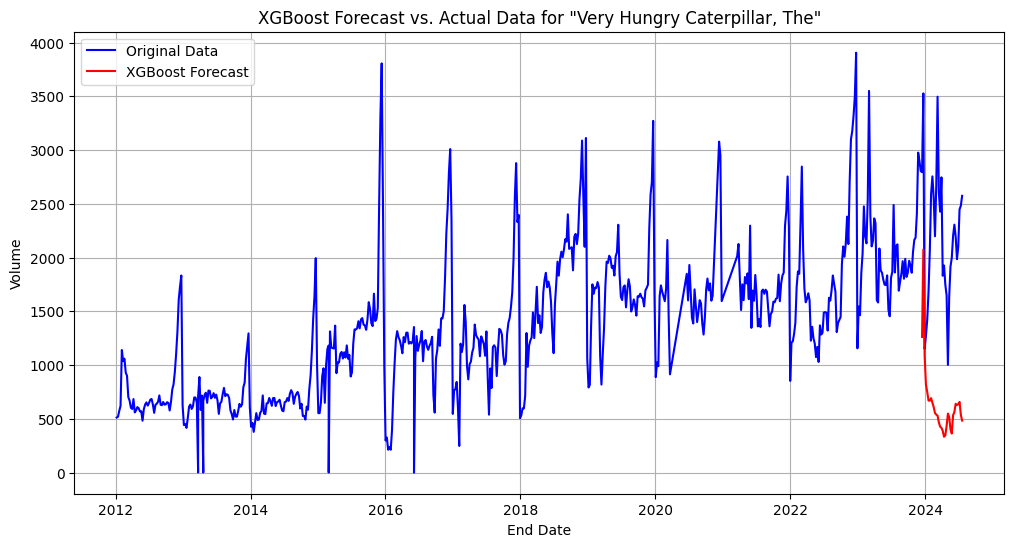

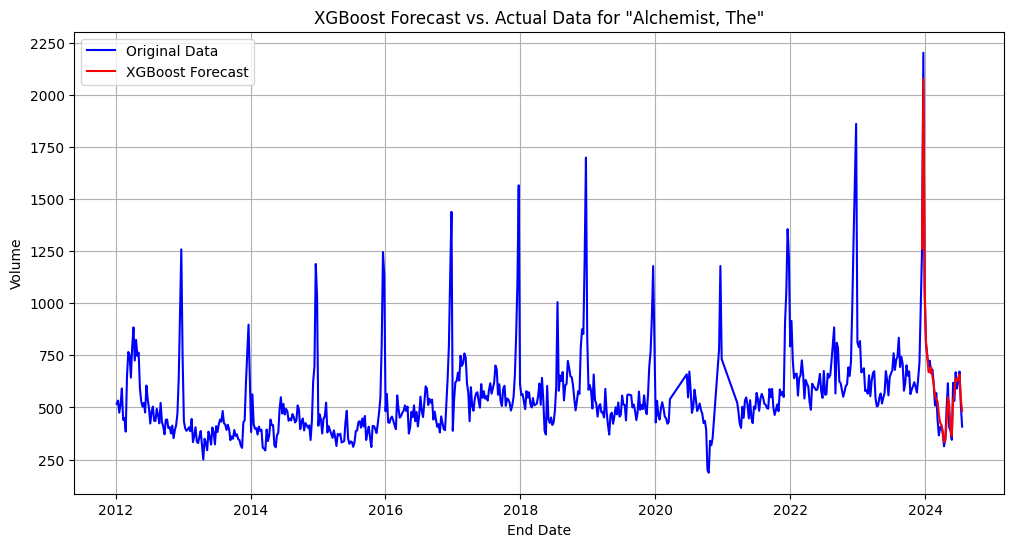

In [ ]:
for title in unique_titles:
    book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()

    # Plot original data and predictions
    plt.figure(figsize=(12, 6))
    plt.plot(book_data.index, book_data['Volume'], label='Original Data', color='blue')
    plt.plot(book_data.index[-forecast_horizon:], final_predictions, label='XGBoost Forecast', color='red')
    plt.title(f'XGBoost Forecast vs. Actual Data for "{title}"')
    plt.xlabel('End Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

for title in unique_titles:
    try:
        y_test = results[title]['y_test']
        predictions = results[title]['test_predictions']
        # Display MAE & MAPE
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        mae = mean_absolute_error(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions)

        print(f"\nPerformance metrics for '{title}':")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  MAPE: {mape:.2%}")
    except Exception as e:
        print(f"\nCould not compute metrics for '{title}': {e}")


Performance metrics for 'Very Hungry Caterpillar, The':
  RMSE: 436.49
  MAE: 352.89
  MAPE: 16.79%

Performance metrics for 'Alchemist, The':
  RMSE: 144.04
  MAE: 103.28
  MAPE: 17.61%


- For The Very Hungry Caterpillar, the error is significantly high and variance of predictions to values is also significant (visibly also underperforming). The conclusion is the XGBoost model struggles with this book title likely due to more volatility and less predictable demand patterns. The model has potential also failed to adequately capture important dynamics such as seasonal spikes and trends.
- For the Alchemist, the error figures are much lower and this is also seen from the plot where the predictions are a closer match to the actual values. This model captured this book's sales pattern more effectively.

# 2. LSTM MODEL

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

start_date_training = pd.to_datetime('2012-01-01')
selected_titles = ['Very Hungry Caterpillar, The', 'Alchemist, The']
analysis_df = df_UK_weekly[df_UK_weekly['Title'].isin(selected_titles)].copy()
analysis_df.set_index('End Date', inplace=True)
analysis_df = analysis_df[analysis_df.index >= start_date_training]
analysis_df = analysis_df.sort_index()

forecast_horizon = 32

In [ ]:
def create_features_lstm(df, window_length):
    """
    Creates lagged features and a target variable from the time series data for LSTM.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data ('Volume').
        window_length (int): The number of lagged periods to include as features.

    Returns:
        tuple:
            - X_lstm (np.ndarray): A 3D numpy array of shape (n_samples, window_length, 1)
            - y_lstm (np.ndarray): A 1D numpy array of shape (n_samples,)
    """
    df_features = df.copy()
    for i in range(1, window_length + 1):
        df_features[f'Lag_{i}'] = df_features['Volume'].shift(i)
    df_features['Target'] = df_features['Volume'].shift(-1)
    df_features = df_features.dropna()

    X_lstm = df_features[[f'Lag_{i}' for i in range(1, window_length + 1)]].values
    y_lstm = df_features['Target'].values
    X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))  # Reshape for LSTM input
    return X_lstm, y_lstm

In [ ]:
def build_lstm_model(hp, window_length):
    """
    Builds an LSTM model using Keras Tuner's hyperparameter search space.

    Args:
        hp (keras_tuner.HyperParameters): Hyperparameter object from Keras Tuner.
        window_length (int): The number of time steps in the input sequence.

    Returns:
        tf.keras.Model: A compiled LSTM model.
    """
    model_lstm = Sequential()
    # Tune the number of LSTM layers
    for i in range(hp.Int('num_lstm_layers', min_value=1, max_value=3)):
        # Tune the number of units in each LSTM layer
        units = hp.Int(f'lstm_units_{i}', min_value=32, max_value=256, step=32)
        if i == 0:
            model_lstm.add(LSTM(units=units, activation='relu', input_shape=(window_length, 1), return_sequences=True if i < hp.Int('num_lstm_layers', min_value=1, max_value=3) - 1 else False))
        else:
            model_lstm.add(LSTM(units=units, activation='relu', return_sequences=True if i < hp.Int('num_lstm_layers', min_value=1, max_value=3) - 1 else False))
        # Tune dropout
        model_lstm.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    model_lstm.add(Dense(units=1))

    # Tune the learning rate
    lr_lstm = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer_lstm = keras.optimizers.Adam(learning_rate=lr_lstm)
    model_lstm.compile(optimizer=optimizer_lstm, loss='mse', metrics=['mae', 'mape'])
    return model_lstm

In [ ]:
from tensorflow.keras import backend as K

def train_lstm_model(book_data, title, window_length):
    K.clear_session()  # Prevents clutter from previous models

    X, y = create_features_lstm(book_data, window_length)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=forecast_horizon, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    tuner = RandomSearch(
        lambda hp: build_lstm_model(hp, window_length),
        objective='val_loss',
        max_trials=5,
        executions_per_trial=3,
        directory=f'lstm_tuner_{title.replace(" ", "_")}',
        project_name='default',
        overwrite=True
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    print(f"\n Starting hyperparameter search for '{title}'...")
    tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop], verbose=1)

    best_model = tuner.get_best_models(1)[0]
    best_hp = tuner.get_best_hyperparameters(1)[0]

    print(f"\nBest Hyperparameters for '{title}':")
    print(best_hp.values)

    print(f"\nModel Summary for '{title}':")
    best_model.summary()

    return best_model, scaler, X_test_scaled, y_test

if __name__ == '__main__':
    window_length = 10
    forecast_horizon = 32
    results_summary = {}

    for title in analysis_df['Title'].unique():
        print(f"\n Processing LSTM for '{title}'")
        book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()
        best_model, scaler, X_test_scaled, y_test = train_lstm_model(book_data, title, window_length)

        # Save results for each book
        results_summary[title] = {
            'model': best_model,
            'scaler': scaler,
            'X_test': X_test_scaled,
            'y_test': y_test
        }

        print(f" Finished training for '{title}'\n")

    #  Now display summary for all books
    for title, result in results_summary.items():
        print(f"\n Final Evaluation for '{title}':")
        predictions = result['model'].predict(result['X_test']).flatten()
        rmse = np.sqrt(mean_squared_error(result['y_test'], predictions))
        mae = mean_absolute_error(result['y_test'], predictions)
        mape = mean_absolute_percentage_error(result['y_test'], predictions)

        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAE:  {mae:.2f}")
        print(f"  MAPE: {mape:.2f}")

Trial 5 Complete [00h 00m 26s]
val_loss: 191771.67708333334

Best val_loss So Far: 35493.45703125
Total elapsed time: 00h 01m 41s

Best Hyperparameters for 'Alchemist, The':
{'num_lstm_layers': 1, 'lstm_units_0': 128, 'dropout_0': 0.1, 'learning_rate': 0.001, 'lstm_units_1': 96, 'dropout_1': 0.1, 'lstm_units_2': 256, 'dropout_2': 0.2}

Model Summary for 'Alchemist, The':
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-traina

- Once again, the RMSE and MAE are both higher for Very Hungry Caterpillar, suggesting larger absolute errors.
- Overall, The Alchemist performs better in absolute terms, but both models are relatively weak at fine-grained accuracy. This is likely due to volatility and lack of seasonality capture.


 Plotting LSTM predictions only for 'Very Hungry Caterpillar, The'...
1/1 [==============================] - 0s 15ms/step


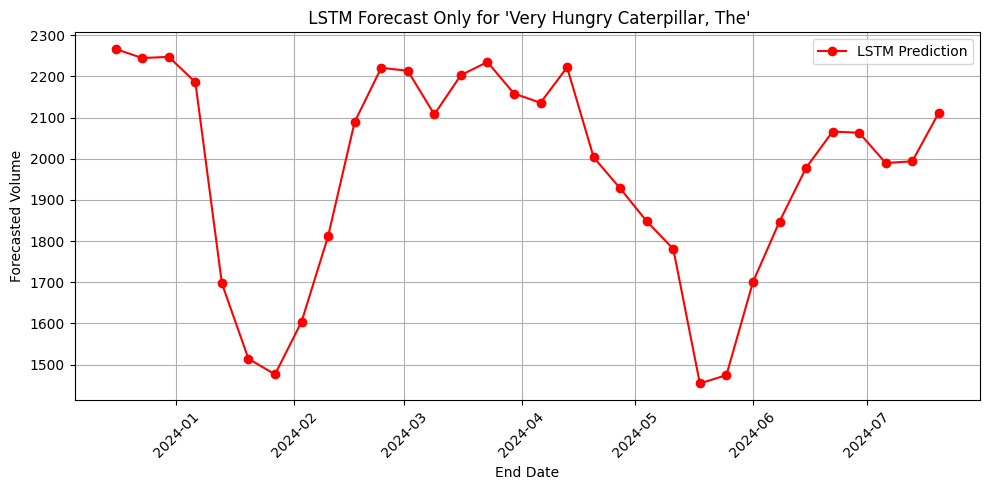


 Plotting LSTM predictions only for 'Alchemist, The'...
1/1 [==============================] - 0s 15ms/step


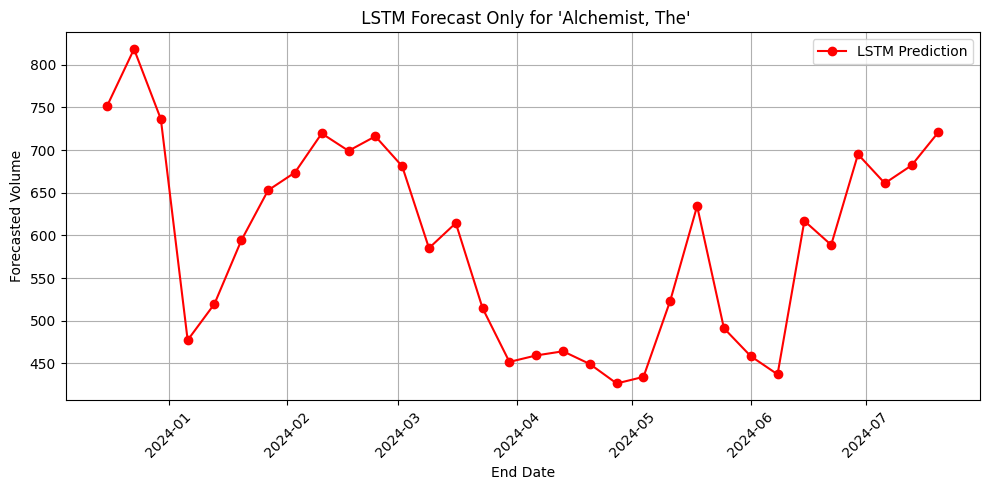

In [ ]:
# Plot of only the LSTM predictions
for title, result in results_summary.items():
    print(f"\n Plotting LSTM predictions only for '{title}'...")

    # Get the original full book data
    book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()
    X_full, _ = create_features_lstm(book_data, window_length)

    # Scale the full input
    X_full_scaled = result['scaler'].transform(X_full.reshape(-1, X_full.shape[-1])).reshape(X_full.shape)

    # Use the last `forecast_horizon` windows for forecasting
    forecast_input = X_full_scaled[-forecast_horizon:]
    forecast = result['model'].predict(forecast_input).flatten()

    # Forecast dates
    forecast_dates = book_data.index[-forecast_horizon:]

    # Plot predictions only
    plt.figure(figsize=(10, 5))
    plt.plot(forecast_dates, forecast, label='LSTM Prediction', color='red', marker='o')
    plt.title(f" LSTM Forecast Only for '{title}'")
    plt.xlabel("End Date")
    plt.ylabel("Forecasted Volume")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


 Plotting forecast for 'Very Hungry Caterpillar, The'...
1/1 [==============================] - 0s 15ms/step


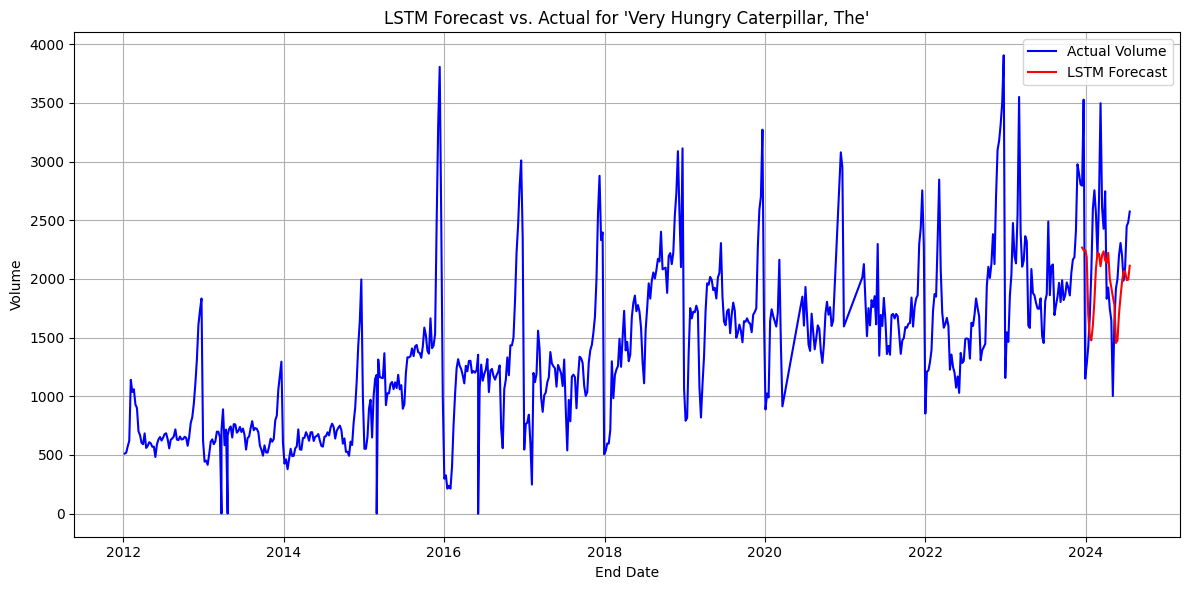


 Plotting forecast for 'Alchemist, The'...
1/1 [==============================] - 0s 15ms/step


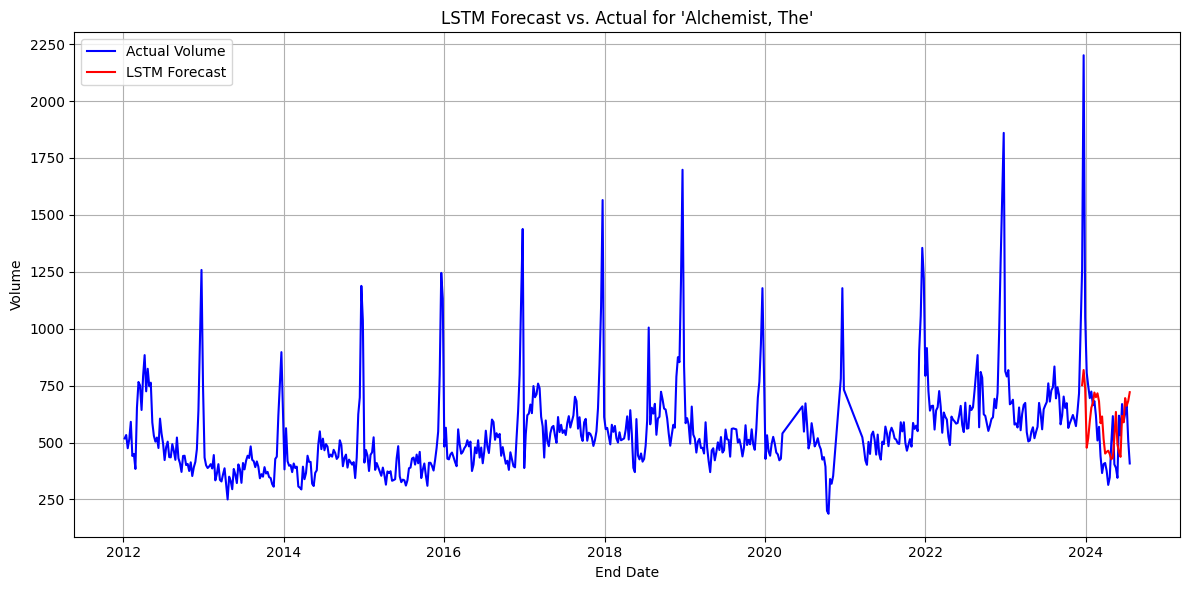

In [ ]:
import matplotlib.pyplot as plt

# Forecast and plot for each book
for title, result in results_summary.items():
    print(f"\n Plotting forecast for '{title}'...")

    # Get the original full book data
    book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()
    X_full, _ = create_features_lstm(book_data, window_length)

    # Scale the full input using the same scaler
    X_full_scaled = result['scaler'].transform(X_full.reshape(-1, X_full.shape[-1])).reshape(X_full.shape)

    # Forecast the last 32 weeks
    forecast_input = X_full_scaled[-forecast_horizon:]
    forecast = result['model'].predict(forecast_input).flatten()

    # Get the forecast dates
    forecast_dates = book_data.index[-forecast_horizon:]

    # Plot actual and forecast
    plt.figure(figsize=(12, 6))
    plt.plot(book_data.index, book_data['Volume'], label='Actual Volume', color='blue')
    plt.plot(forecast_dates, forecast, label='LSTM Forecast', color='red')
    plt.title(f"LSTM Forecast vs. Actual for '{title}'")
    plt.xlabel("End Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

- LSTM is not capturing extreme values — common if the model is underfit, over-smoothed, or lacks capacity to detect sharp temporal spikes.
- LSTM is not capturing that is not capturing the seasonality maybe due to the weekly/monthly patterns.
LSTM does capture the overall directionality of the sales trend — slow upward/downward shifts.

# HYBRID MODELLING
**1. SARIMA AND LSTM (SEQUENTIAL)**

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression

start_date_training = pd.to_datetime('2012-01-01')
selected_titles = ['Very Hungry Caterpillar, The', 'Alchemist, The']
analysis_df = df_UK_weekly[df_UK_weekly['Title'].isin(selected_titles)].copy()
analysis_df.set_index('End Date', inplace=True)
analysis_df = analysis_df[analysis_df.index >= start_date_training]
analysis_df = analysis_df.sort_index()

forecast_horizon = 32

# Define empty results dictionary to store metrics
hybrid_results = {}

In [ ]:
def create_features_lstm(df, window_length):
    """
    Creates lagged features and a target variable from the time series data for LSTM.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data ('Volume').
        window_length (int): The number of lagged periods to include as features.

    Returns:
        tuple:
            - X_lstm (np.ndarray): A 3D numpy array of shape (n_samples, window_length, 1)
            - y_lstm (np.ndarray): A 1D numpy array of shape (n_samples,)
    """
    df_features = df.copy()
    for i in range(1, window_length + 1):
        df_features[f'Lag_{i}'] = df_features['Volume'].shift(i)
    df_features['Target'] = df_features['Volume'].shift(-1)
    df_features = df_features.dropna()

    X_lstm = df_features[[f'Lag_{i}' for i in range(1, window_length + 1)]].values
    y_lstm = df_features['Target'].values
    X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))  # Reshape for LSTM input
    return X_lstm, y_lstm

In [ ]:
def build_lstm_model(hp, window_length):
    """
    Builds an LSTM model using Keras Tuner's hyperparameter search space.

    Args:
        hp (keras_tuner.HyperParameters): Hyperparameter object from Keras Tuner.
        window_length (int): The number of time steps in the input sequence.

    Returns:
        tf.keras.Model: A compiled LSTM model.
    """
    model_lstm = Sequential()
    # Tune the number of LSTM layers
    for i in range(hp.Int('num_lstm_layers', min_value=1, max_value=3)):
        # Tune the number of units in each LSTM layer
        units = hp.Int(f'lstm_units_{i}', min_value=32, max_value=256, step=32)
        if i == 0:
            model_lstm.add(LSTM(units=units, activation='relu', input_shape=(window_length, 1), return_sequences=True if i < hp.Int('num_lstm_layers', min_value=1, max_value=3) - 1 else False))
        else:
            model_lstm.add(LSTM(units=units, activation='relu', return_sequences=True if i < hp.Int('num_lstm_layers', min_value=1, max_value=3) - 1 else False))
        # Tune dropout
        model_lstm.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    model_lstm.add(Dense(units=1))

    # Tune the learning rate
    lr_lstm = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer_lstm = keras.optimizers.Adam(learning_rate=lr_lstm)
    model_lstm.compile(optimizer=optimizer_lstm, loss='mse', metrics=['mae', 'mape'])
    return model_lstm


In [ ]:
def train_and_evaluate_lstm(df, title, window_length, forecast_horizon, sarima_residuals):
    """
    Trains and evaluates an LSTM model for a given book title, using residuals from SARIMA.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data.
        title (str): The title of the book.
        window_length (int): The number of lagged periods to include as features.
        forecast_horizon (int): The number of periods to forecast.
        sarima_residuals (np.ndarray): Residuals from the SARIMA model.
    """
    X_lstm, y_lstm = create_features_lstm(df, window_length)

    # Use the SARIMA residuals as the target for LSTM
    y_lstm = sarima_residuals[-len(y_lstm):]

    # Split data into training and testing sets
    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=forecast_horizon, shuffle=False)

    # Scale the data
    scaler_lstm = StandardScaler()
    X_train_lstm = scaler_lstm.fit_transform(X_train_lstm.reshape(-1, X_train_lstm.shape[-1])).reshape(X_train_lstm.shape)
    X_test_lstm = scaler_lstm.transform(X_test_lstm.reshape(-1, X_test_lstm.shape[-1])).reshape(X_test_lstm.shape)


    # Define the tuner
    tuner_lstm = RandomSearch(
        lambda hp: build_lstm_model(hp, window_length),
        objective='val_loss',
        max_trials=5,
        executions_per_trial=3,
        directory='lstm_tuner',
        project_name=f'lstm_{title}',
        overwrite=True
    )

    # Define early stopping
    early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Perform hyperparameter search
    tuner_lstm.search(X_train_lstm, y_train_lstm, epochs=50, validation_split=0.2, callbacks=[early_stopping_lstm], verbose=1)

    # Get the best model
    best_model_lstm = tuner_lstm.get_best_models(num_models=1)[0]

    # Print the best hyperparameters
    print(f"Best LSTM Hyperparameters for '{title}':")
    print(tuner_lstm.get_best_hyperparameters()[0].values)

    # Evaluate the model on the test set
    predictions_lstm = best_model_lstm.predict(X_test_lstm).flatten()
    rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, predictions_lstm))
    mae_lstm = mean_absolute_error(y_test_lstm, predictions_lstm)
    mape_lstm = mean_absolute_percentage_error(y_test_lstm, predictions_lstm)

    print(f"LSTM Results (Residuals) for '{title}':")
    print(f"  Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")
    print(f"  Mean Absolute Error (MAE): {mae_lstm:.2f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape_lstm:.2f}")

    # Forecast the final 32 weeks
    X_full_lstm, y_full_lstm = create_features_lstm(book_data, window_length)
    X_full_scaled_lstm = scaler_lstm.transform(X_full_lstm.reshape(-1, X_full_lstm.shape[-1])).reshape(X_full_lstm.shape)
    final_predictions_lstm = best_model_lstm.predict(X_full_scaled_lstm[-forecast_horizon:]).flatten()

    return final_predictions_lstm, mae_lstm, mape_lstm

In [ ]:
def train_and_evaluate_sarima(df, title, forecast_horizon):
    """
    Trains and evaluates a SARIMA model for a given book title.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data.
        title (str): The title of the book.
        forecast_horizon (int): The number of periods to forecast.

    Returns:
        tuple:
            - sarima_predictions (np.ndarray): SARIMA predictions for the forecast horizon.
            - sarima_residuals (np.ndarray): Residuals from the SARIMA model.
    """
    # Define and fit the SARIMA model
    try:
        model_sarima = SARIMAX(df['Volume'], order=(1, 1, 1), seasonal_order=(1, 0, 0, 52)) # You can adjust the order
        model_sarima_fit = model_sarima.fit(disp=False)
    except Exception as e:
        print(f"Error fitting SARIMA for '{title}': {e}")
        return None, None

    # Get SARIMA predictions
    sarima_predictions = model_sarima_fit.get_forecast(steps=forecast_horizon).predicted_mean
    # Get the residuals
    sarima_residuals = model_sarima_fit.resid
    return sarima_predictions, sarima_residuals

Trial 5 Complete [00h 00m 31s]
val_loss: 106616.5234375

Best val_loss So Far: 106576.51822916667
Total elapsed time: 00h 02m 11s
Best LSTM Hyperparameters for 'Very Hungry Caterpillar, The':
{'num_lstm_layers': 3, 'lstm_units_0': 96, 'dropout_0': 0.1, 'learning_rate': 0.01, 'lstm_units_1': 256, 'dropout_1': 0.1, 'lstm_units_2': 32, 'dropout_2': 0.30000000000000004}
1/1 [==============================] - 0s 228ms/step
LSTM Results (Residuals) for 'Very Hungry Caterpillar, The':
  Root Mean Squared Error (RMSE): 417.84
  Mean Absolute Error (MAE): 296.15
  Mean Absolute Percentage Error (MAPE): 1.07
1/1 [==============================] - 0s 16ms/step


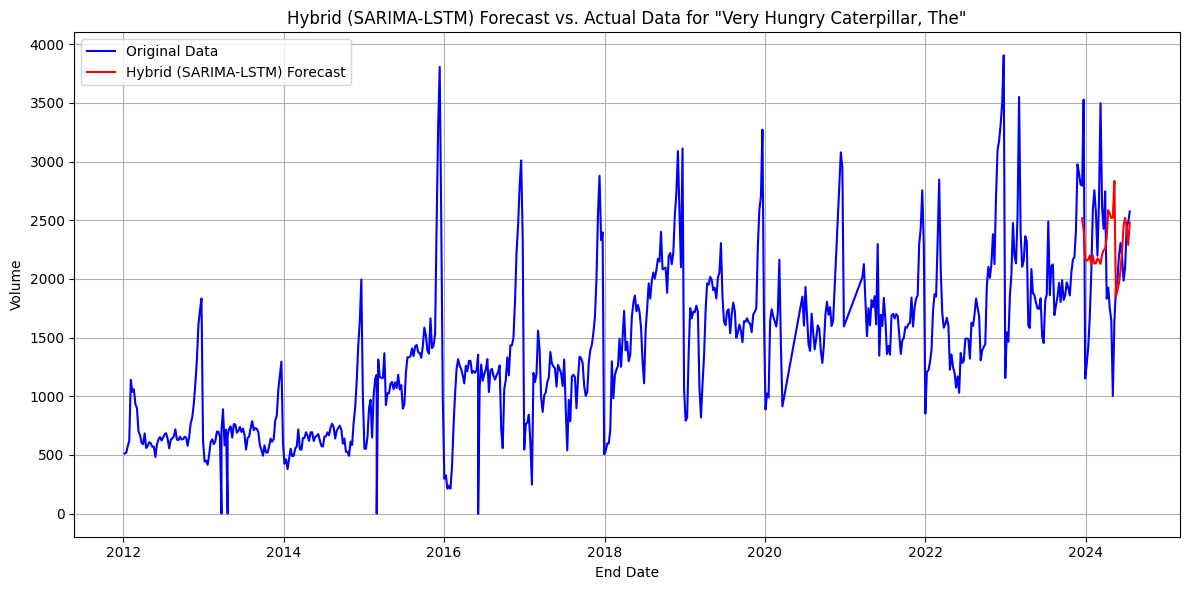

In [ ]:
title = 'Very Hungry Caterpillar, The'
book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()
print(f"\nHybrid (SARIMA-LSTM) Modeling for '{title}':")

# Train SARIMA
sarima_predictions, sarima_residuals = train_and_evaluate_sarima(book_data, title, forecast_horizon)
if sarima_predictions is None or sarima_residuals is None:
    print(f"Skipping LSTM for '{title}' due to SARIMA error.")
else:
    # Train LSTM
    lstm_predictions, mae_lstm, mape_lstm = train_and_evaluate_lstm(book_data, title, window_length, forecast_horizon, sarima_residuals)

    # Combine predictions
    hybrid_predictions = sarima_predictions + lstm_predictions

    # Evaluate hybrid
    actual_values = book_data['Volume'][-forecast_horizon:]
    rmse_hybrid = np.sqrt(mean_squared_error(actual_values, hybrid_predictions))
    mae_hybrid = mean_absolute_error(actual_values, hybrid_predictions)
    mape_hybrid = mean_absolute_percentage_error(actual_values, hybrid_predictions)

    # Store results
    hybrid_results[title] = {
        'RMSE': rmse_hybrid,
        'MAE': mae_hybrid,
        'MAPE': mape_hybrid,
        'predictions': hybrid_predictions,
        'actuals': actual_values
    }

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(book_data.index, book_data['Volume'], label='Original Data', color='blue')
    plt.plot(book_data.index[-forecast_horizon:], hybrid_predictions, label='Hybrid (SARIMA-LSTM) Forecast', color='red')
    plt.title(f'Hybrid (SARIMA-LSTM) Forecast vs. Actual Data for "{title}"')
    plt.xlabel('End Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Comments**
- Despite the low MAPE, indicating small relative errors overall, the absolute errors (MAE, RMSE) are relatively high. This suggests that while predictions are proportionally close, they miss important details in magnitude and structure. This is especially relevant for a book with high volume fluctuations.
- The plot shows poor peak/trough detection. This likely stemming from limited seasonality handling in the LSTM model (trained only on residuals).
- The SARIMA model likely handled the trend and seasonality to some extent, but the residuals (fed into the LSTM) didn't have strong signals left, leading to a flatter forecast that tracks general direction but misses critical sales dynamics.

Trial 5 Complete [00h 00m 18s]
val_loss: 16636.100911458332

Best val_loss So Far: 16161.9326171875
Total elapsed time: 00h 01m 46s
Best LSTM Hyperparameters for 'Alchemist, The':
{'num_lstm_layers': 1, 'lstm_units_0': 96, 'dropout_0': 0.0, 'learning_rate': 0.01, 'lstm_units_1': 224, 'dropout_1': 0.30000000000000004, 'lstm_units_2': 256, 'dropout_2': 0.0}
1/1 [==============================] - 0s 93ms/step
LSTM Results (Residuals) for 'Alchemist, The':
  Root Mean Squared Error (RMSE): 167.62
  Mean Absolute Error (MAE): 109.34
  Mean Absolute Percentage Error (MAPE): 1.07
1/1 [==============================] - 0s 13ms/step


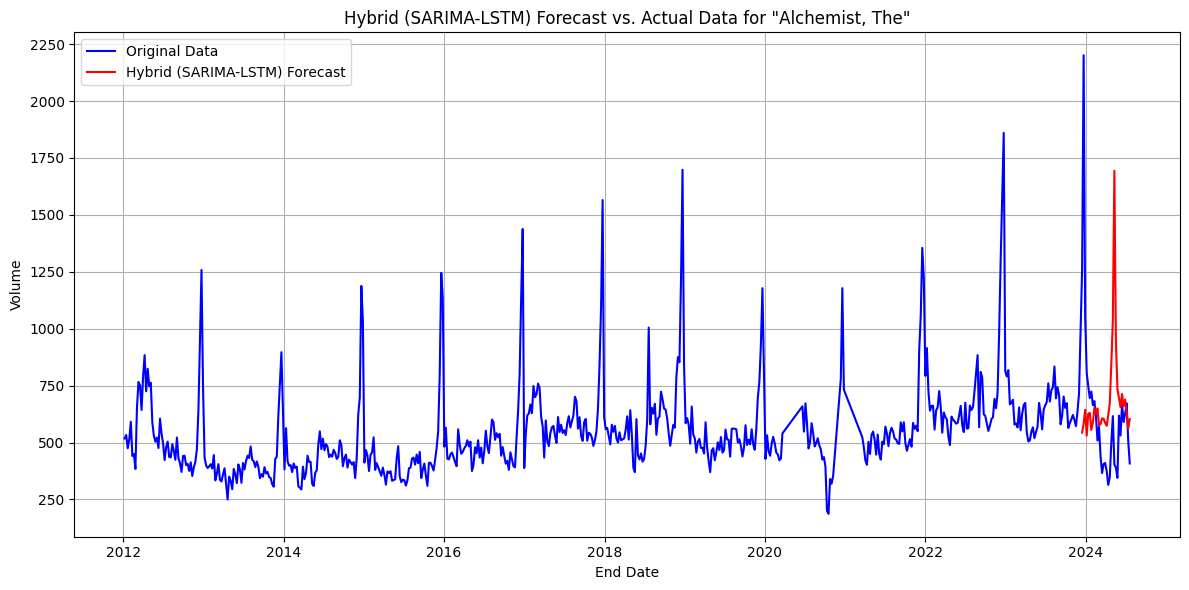

In [ ]:
title = 'Alchemist, The'
book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()
print(f"\nHybrid (SARIMA-LSTM) Modeling for '{title}':")

# Repeat the same process
sarima_predictions, sarima_residuals = train_and_evaluate_sarima(book_data, title, forecast_horizon)
if sarima_predictions is None or sarima_residuals is None:
    print(f"Skipping LSTM for '{title}' due to SARIMA error.")
else:
    lstm_predictions, mae_lstm, mape_lstm = train_and_evaluate_lstm(book_data, title, window_length, forecast_horizon, sarima_residuals)

    hybrid_predictions = sarima_predictions + lstm_predictions

    actual_values = book_data['Volume'][-forecast_horizon:]
    rmse_hybrid = np.sqrt(mean_squared_error(actual_values, hybrid_predictions))
    mae_hybrid = mean_absolute_error(actual_values, hybrid_predictions)
    mape_hybrid = mean_absolute_percentage_error(actual_values, hybrid_predictions)

    hybrid_results[title] = {
        'RMSE': rmse_hybrid,
        'MAE': mae_hybrid,
        'MAPE': mape_hybrid,
        'predictions': hybrid_predictions,
        'actuals': actual_values
    }

    plt.figure(figsize=(12, 6))
    plt.plot(book_data.index, book_data['Volume'], label='Original Data', color='blue')
    plt.plot(book_data.index[-forecast_horizon:], hybrid_predictions, label='Hybrid (SARIMA-LSTM) Forecast', color='red')
    plt.title(f'Hybrid (SARIMA-LSTM) Forecast vs. Actual Data for "{title}"')
    plt.xlabel('End Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Comments**
- Lower RMSE and MAE compared to Caterpillar book, with the same MAPE, imply better overall forecasting accuracy in both magnitude and consistency.

- The model appears to capture a seasonal peak, which is encouraging. It suggests there was a residual pattern the LSTM could learn.
However, temporal misalignment of the peak (predicting it too early/late or at the wrong point in the cycle) shows the model struggles with timing precision.

**2. SARIMA AND LSTM (PARALLEL)**

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch
from keras.callbacks import EarlyStopping

In [ ]:
# Helper Functions

def create_features_lstm(df, window_length):
    df_features = df.copy()
    for i in range(1, window_length + 1):
        df_features[f'Lag_{i}'] = df_features['Volume'].shift(i)
    df_features['Target'] = df_features['Volume'].shift(-1)
    df_features = df_features.dropna()
    X_lstm = df_features[[f'Lag_{i}' for i in range(1, window_length + 1)]].values
    y_lstm = df_features['Target'].values
    X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))
    return X_lstm, y_lstm

def build_lstm_model(hp, window_length):
    model = Sequential()
    for i in range(hp.Int('num_lstm_layers', 1, 2)):
        units = hp.Int(f'lstm_units_{i}', 32, 128, step=32)
        return_seq = (i < hp.Int('num_lstm_layers', 1, 2) - 1)
        model.add(LSTM(units, activation='relu', return_sequences=return_seq, input_shape=(window_length, 1)))
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
    return model

def train_and_evaluate_sarima(df, title, forecast_horizon):
    try:
        model = SARIMAX(df['Volume'], order=(1,1,1), seasonal_order=(1,0,0,52))
        model_fit = model.fit(disp=False)
        forecast = model_fit.forecast(steps=forecast_horizon)
        return forecast.values, model_fit
    except Exception as e:
        print(f"SARIMA error for '{title}': {e}")
        return None, None

def train_and_evaluate_lstm(df, title, window_length, forecast_horizon):
    X, y = create_features_lstm(df, window_length)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=forecast_horizon, shuffle=False)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

    tuner = RandomSearch(
        lambda hp: build_lstm_model(hp, window_length),
        objective='val_loss',
        max_trials=5,
        executions_per_trial=1,
        directory='lstm_tuner_parallel',
        project_name=f'{title.replace(" ", "_")}',
        overwrite=True
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    tuner.search(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early_stop], verbose=0)
    best_model = tuner.get_best_models(1)[0]
    predictions = best_model.predict(X_test).flatten()

    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    return predictions, mae, mape, best_model, scaler


Parallel Hybrid (SARIMA-LSTM) for 'Very Hungry Caterpillar, The':
1/1 [==============================] - 0s 111ms/step


  RMSE: 607.18, MAE: 493.94, MAPE: 0.26


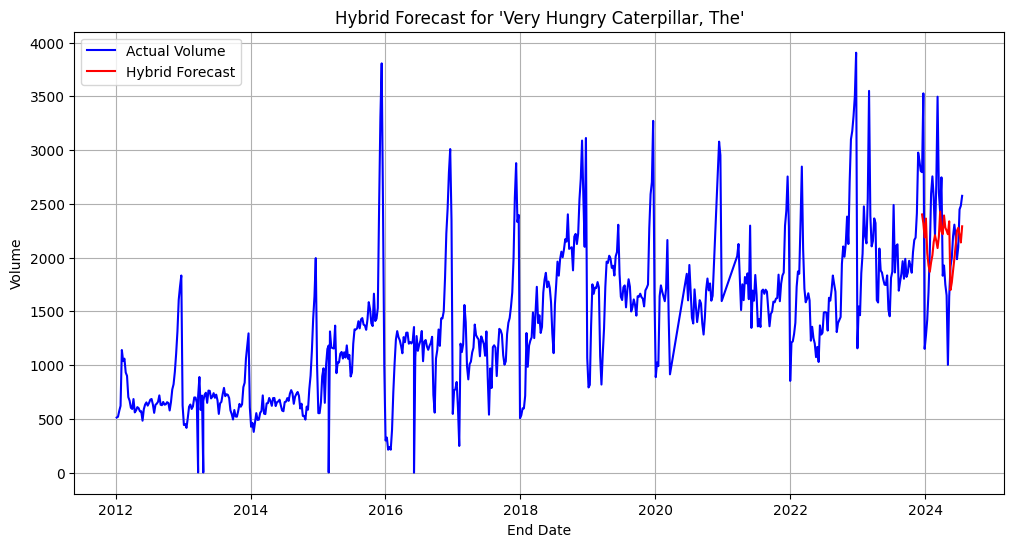


Parallel Hybrid (SARIMA-LSTM) for 'Alchemist, The':
1/1 [==============================] - 0s 155ms/step
  RMSE: 355.85, MAE: 205.31, MAPE: 0.34


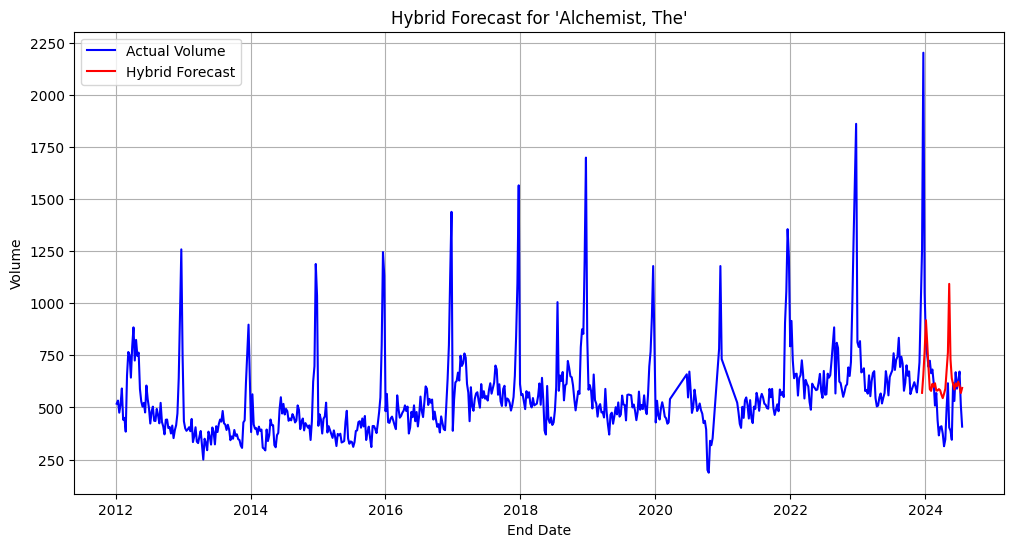

In [ ]:
start_date_training = pd.to_datetime('2012-01-01')
selected_titles = ['Very Hungry Caterpillar, The', 'Alchemist, The']
analysis_df = df_UK_weekly[df_UK_weekly['Title'].isin(selected_titles)].copy()
analysis_df.set_index('End Date', inplace=True)
analysis_df = analysis_df[analysis_df.index >= start_date_training]
analysis_df = analysis_df.sort_index()

forecast_horizon = 32
window_length = 10
lstm_weight = 0.5

for title in analysis_df['Title'].unique():
    print(f"\nParallel Hybrid (SARIMA-LSTM) for '{title}':")
    book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()

    sarima_preds, sarima_model = train_and_evaluate_sarima(book_data, title, forecast_horizon)
    if sarima_preds is None:
        continue

    lstm_preds, lstm_mae, lstm_mape, _, _ = train_and_evaluate_lstm(book_data, title, window_length, forecast_horizon)

    # Hybrid weighted average
    hybrid_preds = (lstm_weight * lstm_preds) + ((1 - lstm_weight) * sarima_preds)

    actual = book_data['Volume'][-forecast_horizon:]
    rmse = np.sqrt(mean_squared_error(actual, hybrid_preds))
    mae = mean_absolute_error(actual, hybrid_preds)
    mape = mean_absolute_percentage_error(actual, hybrid_preds)

    print(f"  RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(book_data.index, book_data['Volume'], label='Actual Volume', color='blue')
    plt.plot(book_data.index[-forecast_horizon:], hybrid_preds, label='Hybrid Forecast', color='red')
    plt.title(f"Hybrid Forecast for '{title}'")
    plt.xlabel('End Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.show()

**The Very Hungry Caterpillar**
- Error metrics are worse than your standalone LSTM model, where RMSE was 417.
- The hybrid model isn't improving the performance, likely because SARIMA is dragging down the forecast accuracy by smoothing too much or failing to capture non-linearities.
- The visual plot suggests that although the general trend is followed, the model fails to model amplitude/the depth of peaks and troughs.
- This suggests both models may be underfitting the seasonality

**The Alchemist**
- Again, this is worse than the standalone LSTM (RMSE 167).
- Visually, the hybrid starts to resemble seasonality, but the timing is misaligned, a sign that SARIMA may be projecting periodic peaks while LSTM misses the exact positioning.
- The poor modeling of troughs may also point to low sensitivity to drops.

Overall,
- 0.5 weighting is arbitrary: It assumes both models are equally competent, which is clearly not the case here.

- SARIMA seems to add noise or drag down accuracy, especially when it doesn't capture true seasonal structure.

- LSTM alone outperforms the hybrid in both books for RMSE and visual fit.


🔄 Hybrid (SARIMA-LSTM) with Weight Tuning for 'Very Hungry Caterpillar, The':


1/1 [==============================] - 0s 89ms/step


  ✅ Best LSTM Weight: 0.8
  RMSE: 591.56, MAE: 473.56, MAPE: 0.24


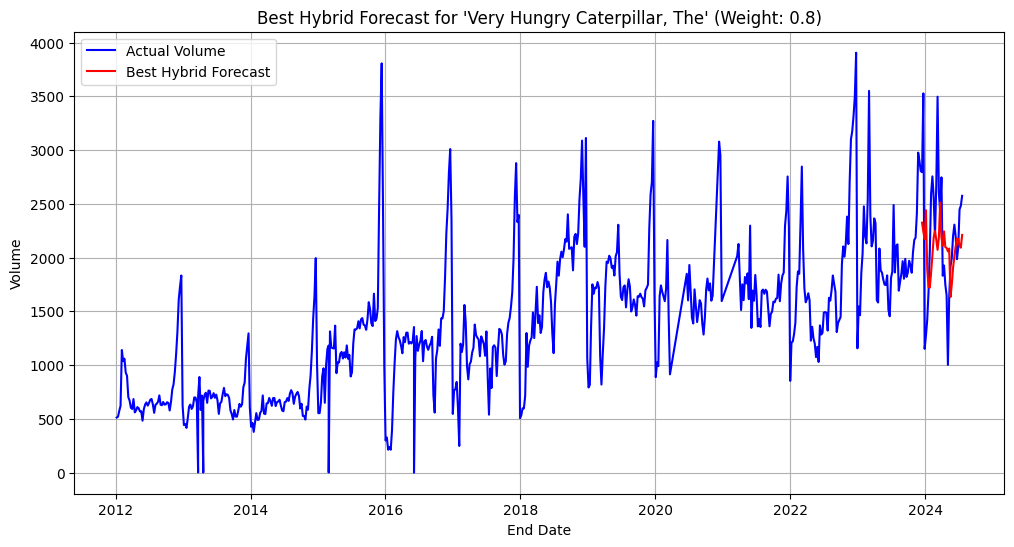


🔄 Hybrid (SARIMA-LSTM) with Weight Tuning for 'Alchemist, The':
1/1 [==============================] - 0s 90ms/step


  ✅ Best LSTM Weight: 0.9
  RMSE: 323.63, MAE: 190.03, MAPE: 0.29


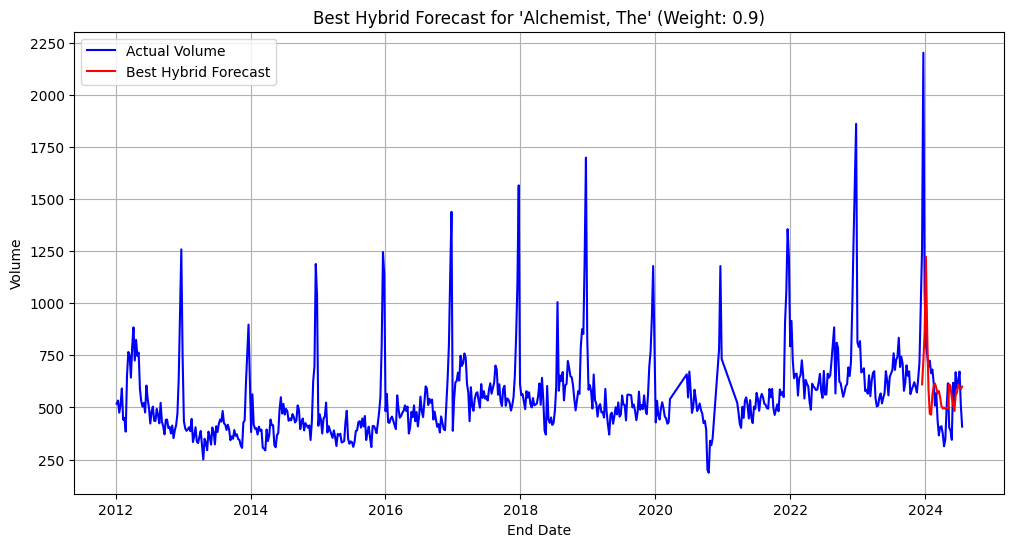

In [ ]:
# Modifying weightage to find the best model weights

start_date_training = pd.to_datetime('2012-01-01')
selected_titles = ['Very Hungry Caterpillar, The', 'Alchemist, The']
analysis_df = df_UK_weekly[df_UK_weekly['Title'].isin(selected_titles)].copy()
analysis_df.set_index('End Date', inplace=True)
analysis_df = analysis_df[analysis_df.index >= start_date_training]
analysis_df = analysis_df.sort_index()

forecast_horizon = 32
window_length = 10

results_summary = {}

for title in analysis_df['Title'].unique():
    print(f"\n Hybrid (SARIMA-LSTM) with Weight Tuning for '{title}':")
    book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()

    sarima_preds, sarima_model = train_and_evaluate_sarima(book_data, title, forecast_horizon)
    if sarima_preds is None:
        continue

    lstm_preds, lstm_mae, lstm_mape, _, _ = train_and_evaluate_lstm(book_data, title, window_length, forecast_horizon)

    actual = book_data['Volume'][-forecast_horizon:]

    best_rmse = float('inf')
    best_weight = None
    best_hybrid = None

    for weight in np.arange(0.1, 1.0, 0.1):
        hybrid = (weight * lstm_preds) + ((1 - weight) * sarima_preds)
        rmse = np.sqrt(mean_squared_error(actual, hybrid))
        if rmse < best_rmse:
            best_rmse = rmse
            best_weight = weight
            best_hybrid = hybrid

    mae = mean_absolute_error(actual, best_hybrid)
    mape = mean_absolute_percentage_error(actual, best_hybrid)

    results_summary[title] = {
        'RMSE': best_rmse,
        'MAE': mae,
        'MAPE': mape,
        'Best Weight (LSTM)': best_weight,
        'Hybrid Predictions': best_hybrid,
        'Actual': actual
    }

    print(f"  Best LSTM Weight: {best_weight:.1f}")
    print(f"  RMSE: {best_rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(book_data.index, book_data['Volume'], label='Actual Volume', color='blue')
    plt.plot(book_data.index[-forecast_horizon:], best_hybrid, label='Best Hybrid Forecast', color='red')
    plt.title(f"Best Hybrid Forecast for '{title}' (Weight: {best_weight:.1f})")
    plt.xlabel('End Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.show()

**The Very Hungry Caterpillar**

- Marginal improvement over the fixed 0.5 weight (RMSE was 607.18, now 591.56).
- The high LSTM weighting suggests that SARIMA is contributing little predictive value and may even introduce noise when overemphasised.
- Visual gains in timing and trend show LSTM is doing the heavy lifting.
- But the model still fails to capture amplitude of spikes and dips.

**The Alchemist**

- Better performance across the board compared to fixed weight (RMSE: 355.85, now 323.63).
- Again, LSTM dominates the prediction, with SARIMA only helping slightly at 10%.
- Improved timing of peaks, indicating LSTM is capturing periodic structure more effectively than SARIMA here.
- Still poor depth in peaks/troughs.

Overall,

- LSTM is the dominant driver of forecast quality. SARIMA adds minimal marginal value for these titles.

- Tuning weights helped slightly but didn't radically change performance—suggesting SARIMA’s assumptions may not fit the sales patterns well.

- Predictions are hitting a limit of how well they can capture volatility and extremes.

# EVALUATION USING MONTHLY PREDICTION

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

start_date_training = pd.to_datetime('2012-01-01')
selected_titles = ['Very Hungry Caterpillar, The', 'Alchemist, The']
analysis_df = df_UK_weekly[df_UK_weekly['Title'].isin(selected_titles)].copy()
analysis_df.set_index('End Date', inplace=True)
analysis_df = analysis_df[analysis_df.index >= start_date_training]
analysis_df = analysis_df.sort_index()

In [ ]:
if __name__ == '__main__':
    unique_titles = analysis_df['Title'].unique()

    for title in unique_titles:
        book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()

        # Aggregate to monthly data
        book_data_monthly = book_data.resample('M').sum()
        print(f"\nMonthly Sales Data for '{title}':")
        print(book_data_monthly)


Monthly Sales Data for 'Very Hungry Caterpillar, The':
            Volume
End Date          
2012-01-31    2226
2012-02-29    4168
2012-03-31    3466
2012-04-30    2431
2012-05-31    2223
...            ...
2024-03-31   13949
2024-04-30    7153
2024-05-31    6551
2024-06-30   10785
2024-07-31    7504

[151 rows x 1 columns]

Monthly Sales Data for 'Alchemist, The':
            Volume
End Date          
2012-01-31    2040
2012-02-29    1866
2012-03-31    3604
2012-04-30    3180
2012-05-31    2385
...            ...
2024-03-31    2191
2024-04-30    1534
2024-05-31    1754
2024-06-30    3035
2024-07-31    1590

[151 rows x 1 columns]


 - The Data for each book has been aggregrated to monthly data and is ready for evaluation

**EVALUATE with XG BOOST**

In [ ]:
def create_features(df, window_length):
    """
    Creates lagged features and a target variable from the time series data.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data ('Volume').
        window_length (int): The number of lagged periods to include as features.

    Returns:
        tuple:
            - X (pd.DataFrame): A DataFrame of shape (n_samples, window_length) containing the lagged features.
            - y (pd.Series): A Series of shape (n_samples,) containing the target variable ('Volume' shifted by one period).
    """
    df_features = df.copy()
    for i in range(1, window_length + 1):
        df_features[f'Lag_{i}'] = df_features['Volume'].shift(i)
    df_features['Target'] = df_features['Volume'].shift(-1)
    df_features = df_features.dropna()  # Drop rows with NaN values created by the shifting
    X = df_features[[f'Lag_{i}' for i in range(1, window_length + 1)]]
    y = df_features['Target']
    return X, y

In [ ]:
# Dictionary of the best params from the XG Boost Model from Weekly data

best_params_dict = {
    "Very Hungry Caterpillar, The": {
        "window_length": 52,
        "params": {
            'objective': 'reg:squarederror',
            'n_estimators': 200,
            'learning_rate': 0.01,
            'max_depth': 3,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': 42
        }
    },
    "Alchemist, The": {
        "window_length": 8,
        "params": {
            'objective': 'reg:squarederror',
            'n_estimators': 200,
            'learning_rate': 0.1,
            'max_depth': 3,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': 42
        }
    }
}

In [ ]:
def train_and_evaluate_xgboost(df, title, forecast_horizon):
    """
    Trains and evaluates an XGBoost model for a given book title using its best parameters.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data.
        title (str): The title of the book.
        forecast_horizon (int): The number of periods to forecast.

    Returns:
        None
    """
    # Retrieve best parameters and window length
    config = best_params_dict.get(title)
    if config is None:
        raise ValueError(f"No best parameters found for title '{title}'")

    window_length = config['window_length']
    best_params = config['params']

    X, y = create_features(df, window_length)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=forecast_horizon, shuffle=False)

    # Train model
    model_xgb = xgb.XGBRegressor(**best_params)
    model_xgb.fit(X_train, y_train)

    # Predict and evaluate
    predictions_xgb = model_xgb.predict(X_test)
    mae_xgb = mean_absolute_error(y_test, predictions_xgb)
    mape_xgb = mean_absolute_percentage_error(y_test, predictions_xgb)

    print(f"XGBoost Results for '{title}':")
    print(f"  Mean Absolute Error (MAE): {mae_xgb:.2f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}")

    # Forecast future
    X_full, y_full = create_features(df, window_length)
    final_predictions_xgb = model_xgb.predict(X_full[-forecast_horizon:])

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volume'], label='Original Data', color='blue')
    plt.plot(df.index[-forecast_horizon:], final_predictions_xgb, label='XGBoost Forecast', color='red')
    plt.title(f'XGBoost Forecast vs. Actual Data for "{title}"')
    plt.xlabel('End Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.show()


Monthly Sales Data for 'Very Hungry Caterpillar, The':
            Volume
End Date          
2012-01-31    2226
2012-02-29    4168
2012-03-31    3466
2012-04-30    2431
2012-05-31    2223
...            ...
2024-03-31   13949
2024-04-30    7153
2024-05-31    6551
2024-06-30   10785
2024-07-31    7504

[151 rows x 1 columns]

XGBoost Modeling for 'Very Hungry Caterpillar, The':
XGBoost Results for 'Very Hungry Caterpillar, The':
  Mean Absolute Error (MAE): 2639.24
  Mean Absolute Percentage Error (MAPE): 0.23


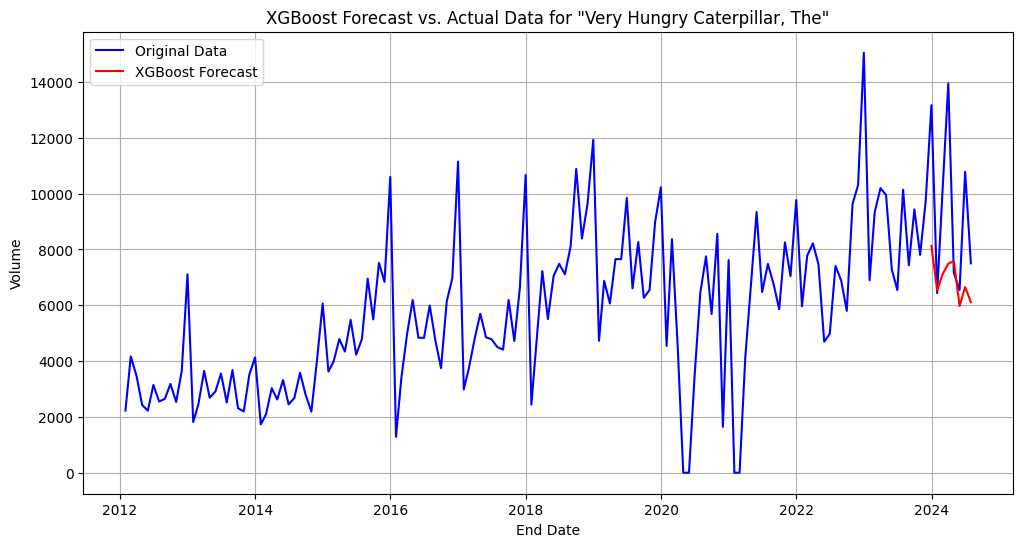


Monthly Sales Data for 'Alchemist, The':
            Volume
End Date          
2012-01-31    2040
2012-02-29    1866
2012-03-31    3604
2012-04-30    3180
2012-05-31    2385
...            ...
2024-03-31    2191
2024-04-30    1534
2024-05-31    1754
2024-06-30    3035
2024-07-31    1590

[151 rows x 1 columns]

XGBoost Modeling for 'Alchemist, The':
XGBoost Results for 'Alchemist, The':
  Mean Absolute Error (MAE): 1050.27
  Mean Absolute Percentage Error (MAPE): 0.40


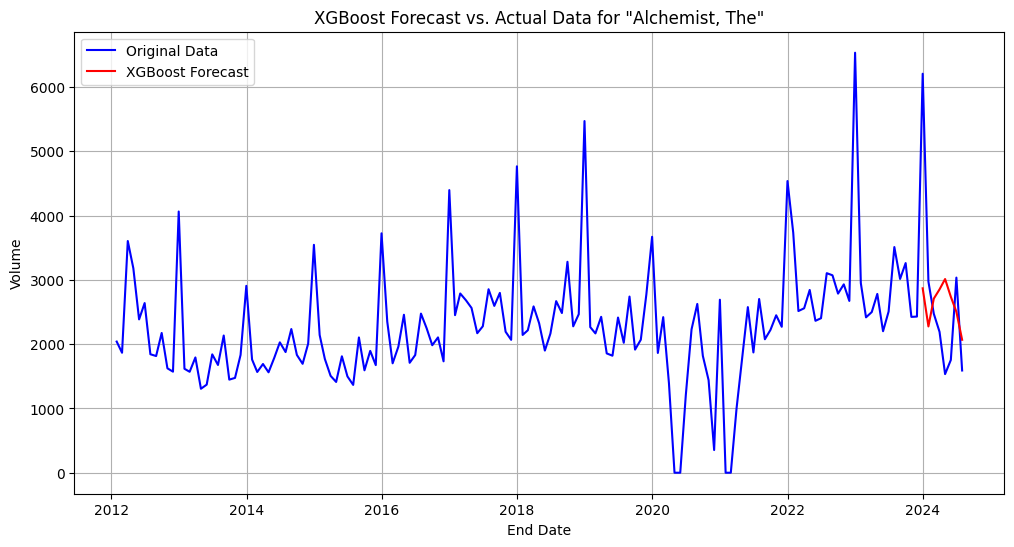

In [ ]:
if __name__ == '__main__':
    unique_titles = analysis_df['Title'].unique()
    monthly_forecast_horizon = 8

    for title in unique_titles:
        book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()

        # Aggregate to monthly data
        book_data_monthly = book_data.resample('M').sum()
        print(f"\nMonthly Sales Data for '{title}':")
        print(book_data_monthly)

        print(f"\nXGBoost Modeling for '{title}':")
        train_and_evaluate_xgboost(book_data_monthly, title, monthly_forecast_horizon)

**The Very Hungry Caterpillar**

- Trend and timing of predictions seem generally aligned with actuals.
- The model fails to capture peaks, possibly due to smoothing caused by monthly aggregation.
- There is overestimation of trough (dip) possibly due to lack of seasonal awareness. XGBoost interpreting regular dips as deeper than they are, possibly overfitting some patterns in training.

**The Alchemist**

- Poor timing suggests that the model isn't capturing the seasonal shifts accurately. Possibly mistimed a major sales period.
- The increase in MAPE (0.40) signals a weaker overall fit than for the Caterpillar book.

Overall,

- Monthly aggregation provides a smoother time series with less noise.
- However, for XG Boost, it reduces the number of data points (which hurts a tree-based model's ability to learn).

- May obscure shorter-term effects and make it harder to model peaks, promotions, and holidays.

- May require re-tuning lags and ensuring enough history is preserved.

**EVALUATE with AUTO-ARIMA**

In [ ]:
# Training using Auto-ARIMA model

def train_and_evaluate_auto_arima(df, title, forecast_horizon):
    """
    Trains and evaluates an Auto-ARIMA model for a given book title.

    Args:
        df (pd.DataFrame): The input DataFrame with the time series data.
        title (str): The title of the book.
        forecast_horizon (int): The number of periods to forecast.

    Returns:
        None: The function prints the evaluation metrics and plots the results.
    """

    # Split the data into training and testing sets
    train_data = df[:-forecast_horizon]
    test_data = df[-forecast_horizon:]

    # Define and train the Auto-ARIMA model
    # Use best parameters from weekly data (example - you'll need to replace with your actual best params)
    best_params = {
        'p': 5,  # Example value, adjust as needed
        'd': 1,  # Example value, adjust as needed
        'q': 2,  # Example value, adjust as needed
        'seasonal': True,  # Example value, adjust as needed
        'm': 52,  # Example value, adjust as needed (weekly seasonality)
    }
    model_auto_arima = auto_arima(train_data['Volume'],
                                  start_p=0, start_q=0,
                                  max_p=5, max_q=5,
                                  m=12,  # Monthly seasonality
                                  start_P=0, seasonal=True,
                                  d=1, D=1,
                                  trace=True,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)
    # Fit the model
    model_auto_arima.fit(train_data['Volume'])

    # Make predictions
    predictions_auto_arima = model_auto_arima.predict(n_periods=forecast_horizon)
    predictions_auto_arima = pd.Series(predictions_auto_arima, index=test_data.index)


    # Evaluate the model
    mae_auto_arima = mean_absolute_error(test_data['Volume'], predictions_auto_arima)
    mape_auto_arima = mean_absolute_percentage_error(test_data['Volume'], predictions_auto_arima)

    print(f"Auto-ARIMA Results for '{title}':")
    print(f"  Mean Absolute Error (MAE): {mae_auto_arima:.2f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape_auto_arima:.2f}")

    # Plot original data and predictions
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volume'], label='Original Data', color='blue')
    plt.plot(test_data.index, predictions_auto_arima, label='Auto-ARIMA Forecast', color='red')
    plt.title(f'Auto-ARIMA Forecast vs. Actual Data for "{title}"')
    plt.xlabel('End Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.show()


Monthly Sales Data for 'Very Hungry Caterpillar, The':
            Volume
End Date          
2012-01-31    2226
2012-02-29    4168
2012-03-31    3466
2012-04-30    2431
2012-05-31    2223
...            ...
2024-03-31   13949
2024-04-30    7153
2024-05-31    6551
2024-06-30   10785
2024-07-31    7504

[151 rows x 1 columns]

Auto-ARIMA Modeling for 'Very Hungry Caterpillar, The':
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2361.855, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2412.117, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2368.725, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2344.539, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2407.026, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2345.903, Time=0.20 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2345.962, Time=0.58 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2364.989, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[12]             

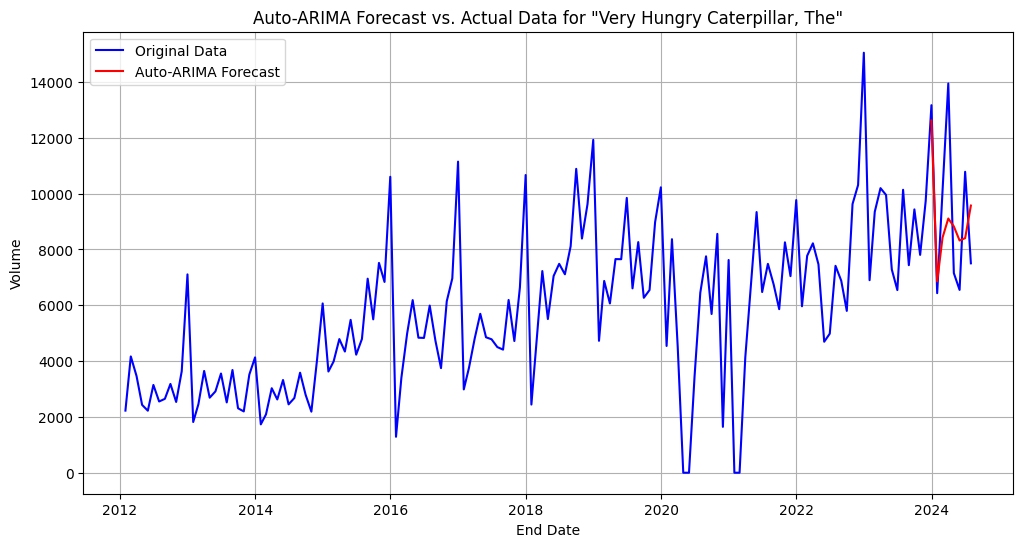


Monthly Sales Data for 'Alchemist, The':
            Volume
End Date          
2012-01-31    2040
2012-02-29    1866
2012-03-31    3604
2012-04-30    3180
2012-05-31    2385
...            ...
2024-03-31    2191
2024-04-30    1534
2024-05-31    1754
2024-06-30    3035
2024-07-31    1590

[151 rows x 1 columns]

Auto-ARIMA Modeling for 'Alchemist, The':
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2054.484, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2107.331, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2066.220, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2039.234, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2097.113, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2040.631, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2040.544, Time=0.63 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2062.225, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.69 sec
 AR

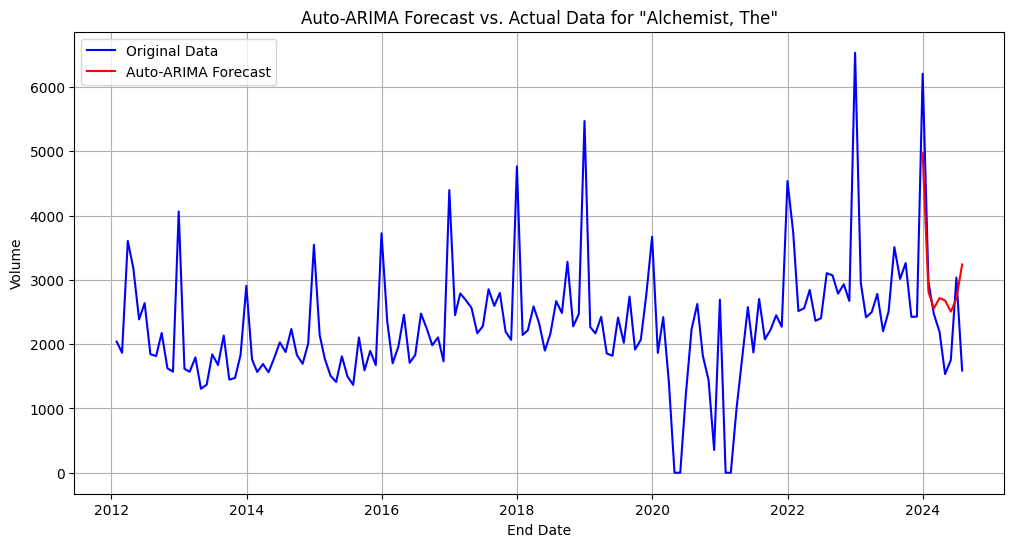

In [ ]:
if __name__ == '__main__':
    unique_titles = analysis_df['Title'].unique()
    monthly_forecast_horizon = 8

    for title in unique_titles:
        book_data = analysis_df[analysis_df['Title'] == title][['Volume']].dropna()

        # Aggregate to monthly data
        book_data_monthly = book_data.resample('M').sum()
        print(f"\nMonthly Sales Data for '{title}':")
        print(book_data_monthly)

        print(f"\nAuto-ARIMA Modeling for '{title}':")
        train_and_evaluate_auto_arima(book_data_monthly, title, monthly_forecast_horizon)

**Compare and contrast**
- Auto-ARIMA outperformed XGBoost for both books in terms of error metrics, especially on MAE.
- However, neither model handles dynamic peaks and troughs well over time — ARIMA smooths them, XGBoost ignores or misaligns them.
- Monthly aggregation may be helpful for trend modeling and seasonality, but hurts models that rely on frequency.